<a href="https://colab.research.google.com/github/politerishi/Credit_Card_Default_Prediction/blob/main/Credit_VKSU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    --:   **Credit_Card_Default_Prediction_Capstone_Project**



##### **Project Type**    - **Machine Learning on Classification**
##### **Contribution**    - **Individual/**
**Name : Rishi Kumar**

**Using Python , Machine Learning**

**IDE - Google Colab**

# **Project Summary -**

This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card payments.

In recent years, the credit card issuers in Taiwan faced the cash and credit card debt crisis and the delinquency is expected to peak in the third quarter of 2006 (Chou,2006). In order to increase market share, card-issuing banks in Taiwan over-issued cash and credit cards to unqualified applicants. At the same time, most cardholders, irrespective of their repayment ability, overused credit card for consumption and accumulated heavy credit and cash–card debts. The crisis caused the blow to consumer finance confidence and it is a big challenge for both banks and cardholders

The above dataset has 30000 rows and 25 columns. There are no mising values and duplicate values in the dataset.

In today’s world credit cards have become a lifeline 
to a lot of people so banks provide us with credit 
cards. Now we know the most common issue there 
is in providing these kind of deals are people not 
being able to pay the bills. These people are what 
we call “defaulters”.

# **GitHub Link -**

 GitHub Link - https://github.com/politerishi/Credit_Card_Default_Prediction.git

# **Problem Statement**



This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card payments.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, plot_precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

Here are a few reasons why we need to import libraries in Python:

Extended functionality: Libraries provide additional functions and classes that are not available in the core Python language. They cover a wide range of domains, such as data manipulation, scientific computing, web development, machine learning, and more. By importing these libraries, you gain access to their capabilities and can use them in your own projects.

Efficiency and optimization: Libraries are often optimized for performance, providing efficient algorithms and data structures that can speed up your code execution. They are typically written in lower-level languages like C or C++ to provide better performance, while still exposing a Python interface.

Code organization and modularity: Libraries allow you to organize your code into reusable modules. Instead of writing everything from scratch, you can import specific modules or functions from a library to perform specific tasks. This promotes modularity, making your code more maintainable, readable, and easier to debug.

Collaboration and community support: Python has a vast and active community of developers who contribute to various libraries. By importing these libraries, you can benefit from the collective knowledge and expertise of the community. You can also share your own libraries with others, fostering collaboration and innovation.

Rapid development: Libraries can significantly speed up the development process by providing ready-to-use solutions for common problems. Instead of spending time writing complex code, you can leverage the functionality provided by libraries and focus on the unique aspects of your project.

### Dataset Loading

In [ ]:
# Load Dataset
data = "https://github.com/politerishi/Credit_Card_Default_Prediction/blob/main/default%20of%20credit%20card%20clients.xls?raw=true"

In [ ]:
pd.read_excel(data)

Unnamed: 0         X1   X2         X3        X4   X5     X6     X7  \
0             ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2   
1              1      20000    2          2         1   24      2      2   
2              2     120000    2          2         2   26     -1      2   
3              3      90000    2          2         2   34      0      0   
4              4      50000    2          2         1   37      0      0   
...          ...        ...  ...        ...       ...  ...    ...    ...   
29996      29996     220000    1          3         1   39      0      0   
29997      29997     150000    1          3         2   43     -1     -1   
29998      29998      30000    1          2         2   37      4      3   
29999      29999      80000    1          3         1   41      1     -1   
30000      30000      50000    1          2         1   46      0      0   

          X8     X9  ...        X15        X16        X17       X18       X19  \
0      PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2   
1         -1     -1  ...          0          0          0         0       689   
2          0      0  ...       3272       3455       3261         0      1000   
3          0      0  ...      14331      14948      15549      1518      1500   
4          0      0  ...      28314      28959      29547      2000      2019   
...      ...    ...  ...        ...        ...        ...       ...       ...   
29996      0      0  ...      88004      31237      15980      8500     20000   
29997     -1     -1  ...       8979       5190          0      1837      3526   
29998      2     -1  ...      20878      20582      19357         0         0   
29999      0      0  ...      52774      11855      48944     85900      3409   
30000      0      0  ...      36535      32428      15313      2078      1800   

            X20       X21       X22       X23                           Y  
0      PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
1             0         0         0         0                           1  
2          1000      1000         0      2000                           1  
3          1000      1000      1000      5000                           0  
4          1200      1100      1069      1000                           0  
...         ...       ...       ...       ...                         ...  
29996      5003      3047      5000      1000                           0  
29997      8998       129         0         0                           0  
29998     22000      4200      2000      3100                           1  
29999      1178      1926     52964      1804                           1  
30000      1430      1000      1000      1000                           1  

[30001 rows x 25 columns]

### Dataset First View

In [ ]:
#reading data
df=pd.read_excel(data,header=1)
df

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996     -1  ...       8979       5190          0      1837      3526   
29997     -1  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0             0         0         0         0                           1  
1          1000      1000         0      2000                           1  
2          1000      1000      1000      5000                           0  
3          1200      1100      1069      1000                           0  
4         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[30000 rows x 25 columns]

**Head: The "head" typically refers to the first element or a portion of the sequence. It can be thought of as the beginning or the initial part of the sequence. For a list, the head is the first element, and for a string, the head is the first character.**

In [ ]:
# Display the last 5 
df.tail()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
29995      0  ...      88004      31237      15980      8500     20000   
29996     -1  ...       8979       5190          0      1837      3526   
29997     -1  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[5 rows x 25 columns]

**Tail: The "tail" refers to the remaining elements or the rest of the sequence after excluding the head. It represents the end or the remaining part of the sequence.**

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(30000, 25)

**In Python, the term "shape" is commonly used in the context of arrays, specifically NumPy arrays. The shape attribute is used to determine the dimensions of an array, such as the number of rows and columns.**

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

**Duplicate values in Python refer to multiple occurrences of the same value within a collection, such as a list, tuple, or set. When a collection contains duplicate values, it means that one or more elements appear more than once.**

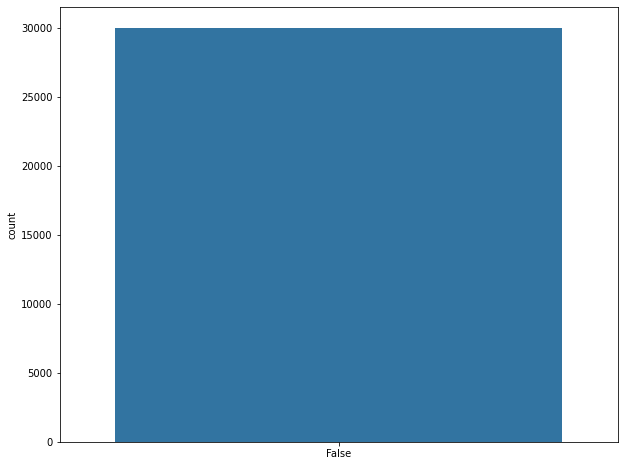

In [ ]:
# Visulizing                          #true means duplicate data
plt.figure(figsize=(10,8))
sns.countplot(x=df.duplicated())

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

Missing values in Python refer to the absence or lack of data in a variable or dataset. They are represented by special values such as None, NaN (Not a Number), or NA (Not Available), depending on the data type and the libraries used.

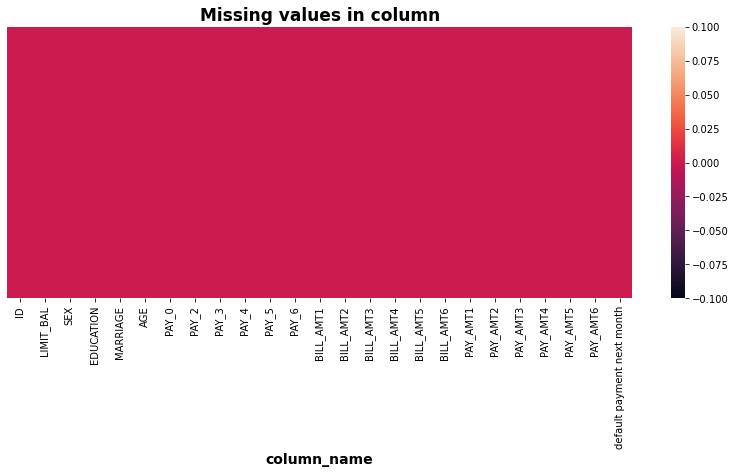

In [ ]:
# Visualizing the missing values
 # Checking Null Value by plotting Heatmap
plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("Missing values in column",fontweight="bold",size=17)
plt.show()

**No null value found**

### What did you know about your dataset?

In recent years, the credit card issuers in Taiwan faced the cash and credit card debt crisis and the delinquency is expected to peak in the third quarter of 2006 (Chou,2006). In order to increase market share, card-issuing banks in Taiwan over-issued cash and credit cards to unqualified applicants. At the same time, most cardholders, irrespective of their repayment ability, overused credit card for consumption and accumulated heavy credit and cash–card debts. The crisis caused the blow to consumer finance confidence and it is a big challenge for both banks and cardholders

The above dataset has 30000 rows and 25 columns. There are no mising values and duplicate values in the dataset.

## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe().transpose()

count           mean            std       min  \
ID                          30000.0   15000.500000    8660.398374       1.0   
LIMIT_BAL                   30000.0  167484.322667  129747.661567   10000.0   
SEX                         30000.0       1.603733       0.489129       1.0   
EDUCATION                   30000.0       1.853133       0.790349       0.0   
MARRIAGE                    30000.0       1.551867       0.521970       0.0   
AGE                         30000.0      35.485500       9.217904      21.0   
PAY_0                       30000.0      -0.016700       1.123802      -2.0   
PAY_2                       30000.0      -0.133767       1.197186      -2.0   
PAY_3                       30000.0      -0.166200       1.196868      -2.0   
PAY_4                       30000.0      -0.220667       1.169139      -2.0   
PAY_5                       30000.0      -0.266200       1.133187      -2.0   
PAY_6                       30000.0      -0.291100       1.149988      -2.0   
BILL_AMT1                   30000.0   51223.330900   73635.860576 -165580.0   
BILL_AMT2                   30000.0   49179.075167   71173.768783  -69777.0   
BILL_AMT3                   30000.0   47013.154800   69349.387427 -157264.0   
BILL_AMT4                   30000.0   43262.948967   64332.856134 -170000.0   
BILL_AMT5                   30000.0   40311.400967   60797.155770  -81334.0   
BILL_AMT6                   30000.0   38871.760400   59554.107537 -339603.0   
PAY_AMT1                    30000.0    5663.580500   16563.280354       0.0   
PAY_AMT2                    30000.0    5921.163500   23040.870402       0.0   
PAY_AMT3                    30000.0    5225.681500   17606.961470       0.0   
PAY_AMT4                    30000.0    4826.076867   15666.159744       0.0   
PAY_AMT5                    30000.0    4799.387633   15278.305679       0.0   
PAY_AMT6                    30000.0    5215.502567   17777.465775       0.0   
default payment next month  30000.0       0.221200       0.415062       0.0   

                                 25%       50%        75%        max  
ID                           7500.75   15000.5   22500.25    30000.0  
LIMIT_BAL                   50000.00  140000.0  240000.00  1000000.0  
SEX                             1.00       2.0       2.00        2.0  
EDUCATION                       1.00       2.0       2.00        6.0  
MARRIAGE                        1.00       2.0       2.00        3.0  
AGE                            28.00      34.0      41.00       79.0  
PAY_0                          -1.00       0.0       0.00        8.0  
PAY_2                          -1.00       0.0       0.00        8.0  
PAY_3                          -1.00       0.0       0.00        8.0  
PAY_4                          -1.00       0.0       0.00        8.0  
PAY_5                          -1.00       0.0       0.00        8.0  
PAY_6                          -1.00       0.0       0.00        8.0  
BILL_AMT1                    3558.75   22381.5   67091.00   964511.0  
BILL_AMT2                    2984.75   21200.0   64006.25   983931.0  
BILL_AMT3                    2666.25   20088.5   60164.75  1664089.0  
BILL_AMT4                    2326.75   19052.0   54506.00   891586.0  
BILL_AMT5                    1763.00   18104.5   50190.50   927171.0  
BILL_AMT6                    1256.00   17071.0   49198.25   961664.0  
PAY_AMT1                     1000.00    2100.0    5006.00   873552.0  
PAY_AMT2                      833.00    2009.0    5000.00  1684259.0  
PAY_AMT3                      390.00    1800.0    4505.00   896040.0  
PAY_AMT4                      296.00    1500.0    4013.25   621000.0  
PAY_AMT5                      252.50    1500.0    4031.50   426529.0  
PAY_AMT6                      117.75    1500.0    4000.00   528666.0  
default payment next month      0.00       0.0       0.00        1.0

**There are 30,000 distinct credit card clients.**

**The average value for the amount of credit card limit is 167484. The standard deviation is unusually large, max value being 1000000.**

**Education Level is mostly graduate school and university.**

**Most of the clients are either married or single .**

**Average age is 35.5 years, with a standard deviation of 9.2**

**As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.221 means that there are 22.1% of credit card contracts that will default next month (will verify this in the next sections of this analysis).**

### Variables Description 

**Predict whether the credit card holders are defaulters or Non-defaulters**
 
 The Dataset and its attributes are described below



1. ID: ID of each client 
2. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
3. SEX: Gender (1=male, 2=female)
4. EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. MARRIAGE: Marital status (1=married, 2=single, 3=others)
6. AGE: Age in years
7. PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months,8=payment delay for eight months, 9=payment delay for nine months and above)
8. PAY_2: Repayment status in August, 2005 (scale same as above)
9. PAY_3: Repayment status in July, 2005 (scale same as above)
10. PAY_4: Repayment status in June, 2005 (scale same as above)
11. PAY_5: Repayment status in May, 2005 (scale same as above)
12. PAY_6: Repayment status in April, 2005 (scale same as above)
13. BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
14. BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
15. BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
16. BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
17. BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
18. BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
19. PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
20. PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
21. PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
22. PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
23. PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
24. PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
25. default.payment.next.month: Default payment (1=yes, 0=no)

### Check Unique Values for each variable.

In [ ]:
df['ID'].nunique()

30000

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("Number of unique values in ",i,"is",df[i].nunique(),".")

Number of unique values in  ID is 30000 .
Number of unique values in  LIMIT_BAL is 81 .
Number of unique values in  SEX is 2 .
Number of unique values in  EDUCATION is 7 .
Number of unique values in  MARRIAGE is 4 .
Number of unique values in  AGE is 56 .
Number of unique values in  PAY_0 is 11 .
Number of unique values in  PAY_2 is 11 .
Number of unique values in  PAY_3 is 11 .
Number of unique values in  PAY_4 is 11 .
Number of unique values in  PAY_5 is 10 .
Number of unique values in  PAY_6 is 10 .
Number of unique values in  BILL_AMT1 is 22723 .
Number of unique values in  BILL_AMT2 is 22346 .
Number of unique values in  BILL_AMT3 is 22026 .
Number of unique values in  BILL_AMT4 is 21548 .
Number of unique values in  BILL_AMT5 is 21010 .
Number of unique values in  BILL_AMT6 is 20604 .
Number of unique values in  PAY_AMT1 is 7943 .
Number of unique values in  PAY_AMT2 is 7899 .
Number of unique values in  PAY_AMT3 is 7518 .
Number of unique values in  PAY_AMT4 is 6937 .
Number of 

## 3. ***Data Wrangling***

Data wrangling, also known as data munging or data preprocessing, refers to the process of cleaning, transforming, and preparing raw data for analysis. It involves converting raw data into a format that is more suitable for analysis, ensuring its quality, and making it ready for further exploration and modeling.

**Data wrangling encompasses a range of tasks, including:**
**bold text**
**Data Cleaning**: This involves handling missing values, removing duplicates, correcting inconsistent data, and addressing outliers. Data cleaning ensures that the dataset is accurate and free from errors that could affect the analysis.

**Data Transformation**: Data transformation involves converting the format or structure of the data to make it more suitable for analysis. This may include changing data types, scaling or normalizing variables, and applying mathematical or statistical operations to create new derived variables.

**Data Integration:** Data integration involves combining data from multiple sources or databases into a single cohesive dataset. This may require resolving inconsistencies in naming conventions, merging datasets based on common variables, and handling data incompatibilities.

**Data Reduction**: Data reduction techniques aim to reduce the size or dimensionality of the dataset while preserving its essential information. This may involve aggregating or summarizing data, feature selection or extraction, or sampling techniques to create a representative subset.

**Data Formatting**: Data formatting involves organizing and structuring the data in a standardized manner. This includes ensuring consistent variable naming, creating appropriate labels or categories, and formatting dates, times, or other data types consistently.



### Data Wrangling Code

In [ ]:
#### Duplicate Values
# Write your code to make your dataset analysis ready.
#renaming dependendent Variable
df.rename(columns={'default payment next month' : 'Defaulters'}, inplace=True)

In [ ]:
# renaming some feature name for better understanding of feature
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)

df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)

df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [ ]:
df.head(5)

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_SEPT  PAY_AUG  PAY_JUL  \
0   1      20000    2          2         1   24         2        2       -1   
1   2     120000    2          2         2   26        -1        2        0   
2   3      90000    2          2         2   34         0        0        0   
3   4      50000    2          2         1   37         0        0        0   
4   5      50000    1          2         1   57        -1        0       -1   

   PAY_JUN  ...  BILL_AMT_JUN  BILL_AMT_MAY  BILL_AMT_APR  PAY_AMT_SEPT  \
0       -1  ...             0             0             0             0   
1        0  ...          3272          3455          3261             0   
2        0  ...         14331         14948         15549          1518   
3        0  ...         28314         28959         29547          2000   
4        0  ...         20940         19146         19131          2000   

   PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  PAY_AMT_APR  Defaulters  
0          689            0            0            0            0           1  
1         1000         1000         1000            0         2000           1  
2         1500         1000         1000         1000         5000           0  
3         2019         1200         1100         1069         1000           0  
4        36681        10000         9000          689          679           0  

[5 rows x 25 columns]

In [ ]:
# Dataset Columns
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'Defaulters'],
      dtype='object')



---



---



---



---



**Bivariate Analysis**

In [ ]:
#analysing categorical variable
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [ ]:
#creating different df for categorical variable
df_cat = df[categorical_features]

In [ ]:
#checking shape of categorical variable
df_cat.shape

(30000, 3)

In [ ]:
#looking into categorical df
df_cat.head()

SEX  EDUCATION  MARRIAGE
0    2          2         1
1    2          2         2
2    2          2         2
3    2          2         1
4    1          2         1

In [ ]:
#checking value counts of categorical_features
for column_name in df_cat.columns:
  print(f'count of {column_name} features')
  print(f'\n{df_cat[column_name].value_counts()}\n')

count of SEX features

2    18112
1    11888
Name: SEX, dtype: int64

count of EDUCATION features

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

count of MARRIAGE features

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64



In [ ]:
#maping numerical value to categorical for easy understanding
df_cat['SEX']=df_cat['SEX'].map({1:'Male',2:'Female'})
df_cat['EDUCATION']=df_cat['EDUCATION'].map({1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'other',5:'other',6:'other',0:'other'})
df_cat['MARRIAGE']=df_cat['MARRIAGE'].map({1 : 'married', 2 : 'single', 3 : 'others',0 : 'others'})

In [ ]:
df_cat.head()

SEX   EDUCATION MARRIAGE
0  Female  university  married
1  Female  university   single
2  Female  university   single
3  Female  university  married
4    Male  university  married

In [ ]:
#checking value counts of categorical_features
for column_name in df_cat.columns:
  print(f'count of {column_name} features')
  print(f'\n{df_cat[column_name].value_counts()}\n')

count of SEX features

Female    18112
Male      11888
Name: SEX, dtype: int64

count of EDUCATION features

university         14030
graduate school    10585
high school         4917
other                468
Name: EDUCATION, dtype: int64

count of MARRIAGE features

single     15964
married    13659
others       377
Name: MARRIAGE, dtype: int64





---


---




---



---



In [ ]:
#desribing age variable
df['AGE'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [ ]:
#creating defaulter variable on df_cat
df_cat['Defaulter'] = df['Defaulters']

In [ ]:
df_cat.head()

SEX   EDUCATION MARRIAGE  Defaulter
0  Female  university  married          1
1  Female  university   single          1
2  Female  university   single          0
3  Female  university  married          0
4    Male  university  married          0

In [ ]:
#checking the defaulter ratio of categories
for column_name in df_cat.columns[:-1]:
  print(df_cat[['Defaulter',column_name]].groupby(column_name).mean().reset_index())

      SEX  Defaulter
0  Female   0.207763
1    Male   0.241672
         EDUCATION  Defaulter
0  graduate school   0.192348
1      high school   0.251576
2            other   0.070513
3       university   0.237349
  MARRIAGE  Defaulter
0  married   0.234717
1   others   0.236074
2   single   0.209283


In [ ]:
# creating function to create the cohort for age group
def age_cohort(age):
  if age in range(21,31) : # starting from 21 because minimum age is 21 in our dataset
    return '21-30'
  elif age in range(31,41) :
    return '31-40'
  elif age in range(41,51) :
    return '41-50'
  elif age in range(51,61) :
    return '51-60'
  else:
    return '60 & above'

In [ ]:
#creating age_group column in our data set
df['age_group']=df['AGE'].apply(lambda x: age_cohort(x))

In [ ]:
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_SEPT  PAY_AUG  PAY_JUL  \
0   1      20000    2          2         1   24         2        2       -1   
1   2     120000    2          2         2   26        -1        2        0   
2   3      90000    2          2         2   34         0        0        0   
3   4      50000    2          2         1   37         0        0        0   
4   5      50000    1          2         1   57        -1        0       -1   

   PAY_JUN  ...  BILL_AMT_MAY  BILL_AMT_APR  PAY_AMT_SEPT  PAY_AMT_AUG  \
0       -1  ...             0             0             0          689   
1        0  ...          3455          3261             0         1000   
2        0  ...         14948         15549          1518         1500   
3        0  ...         28959         29547          2000         2019   
4        0  ...         19146         19131          2000        36681   

   PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  PAY_AMT_APR  Defaulters  age_group  
0            0            0            0            0           1      21-30  
1         1000         1000            0         2000           1      21-30  
2         1000         1000         1000         5000           0      31-40  
3         1200         1100         1069         1000           0      31-40  
4        10000         9000          689          679           0      51-60  

[5 rows x 26 columns]

In [ ]:
#cheacking the count of age_group
df['age_group'].value_counts().sort_values(ascending=False)

21-30         11013
31-40         10713
41-50          6005
51-60          1997
60 & above      272
Name: age_group, dtype: int64

In [ ]:
# drop age column because now we have age_group in our dataset
df=df.drop('AGE',axis=1)

In [ ]:
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  PAY_SEPT  PAY_AUG  PAY_JUL  \
0   1      20000    2          2         1         2        2       -1   
1   2     120000    2          2         2        -1        2        0   
2   3      90000    2          2         2         0        0        0   
3   4      50000    2          2         1         0        0        0   
4   5      50000    1          2         1        -1        0       -1   

   PAY_JUN  PAY_MAY  ...  BILL_AMT_MAY  BILL_AMT_APR  PAY_AMT_SEPT  \
0       -1       -2  ...             0             0             0   
1        0        0  ...          3455          3261             0   
2        0        0  ...         14948         15549          1518   
3        0        0  ...         28959         29547          2000   
4        0        0  ...         19146         19131          2000   

   PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  PAY_AMT_APR  \
0          689            0            0            0            0   
1         1000         1000         1000            0         2000   
2         1500         1000         1000         1000         5000   
3         2019         1200         1100         1069         1000   
4        36681        10000         9000          689          679   

   Defaulters  age_group  
0           1      21-30  
1           1      21-30  
2           0      31-40  
3           0      31-40  
4           0      51-60  

[5 rows x 25 columns]




---



---


---



---



In [ ]:
# Payment delay description
df[['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']].describe()

PAY_SEPT       PAY_AUG       PAY_JUL       PAY_JUN       PAY_MAY  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186      1.196868      1.169139      1.133187   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

            PAY_APR  
count  30000.000000  
mean      -0.291100  
std        1.149988  
min       -2.000000  
25%       -1.000000  
50%        0.000000  
75%        0.000000  
max        8.000000

In [ ]:
#Previous Payment Description
df[['PAY_AMT_SEPT','PAY_AMT_AUG','PAY_AMT_JUL','PAY_AMT_JUN','PAY_AMT_MAY','PAY_AMT_APR']].describe()

PAY_AMT_SEPT   PAY_AMT_AUG   PAY_AMT_JUL    PAY_AMT_JUN  \
count   30000.000000  3.000000e+04   30000.00000   30000.000000   
mean     5663.580500  5.921163e+03    5225.68150    4826.076867   
std     16563.280354  2.304087e+04   17606.96147   15666.159744   
min         0.000000  0.000000e+00       0.00000       0.000000   
25%      1000.000000  8.330000e+02     390.00000     296.000000   
50%      2100.000000  2.009000e+03    1800.00000    1500.000000   
75%      5006.000000  5.000000e+03    4505.00000    4013.250000   
max    873552.000000  1.684259e+06  896040.00000  621000.000000   

         PAY_AMT_MAY    PAY_AMT_APR  
count   30000.000000   30000.000000  
mean     4799.387633    5215.502567  
std     15278.305679   17777.465775  
min         0.000000       0.000000  
25%       252.500000     117.750000  
50%      1500.000000    1500.000000  
75%      4031.500000    4000.000000  
max    426529.000000  528666.000000

### What all manipulations have you done and insights you found?

We can renaming dependendent Variable  and  renaming some feature name for better understanding of feature

maping numerical value to categorical for easy understanding

Gender (1 = male; 2 = female)

Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

Marital status (1 = married; 2 = single; 3 = others)

we can see here min age is 21 and maximum age is 79 in our dataset

for Sex feature:
  - we can see that  number of females are more than the males
  - but the default ratio of male is quite higher than female

for Education feature:
  - university and High School pesons are more likely to be defaulter in comparison with  the graduate school persons.

for Marriage feature:
  - people who are not married nor single are more likely to make default of bills in comparison with single and married person

In aur dataset we can clearly see that most of the credit card holder are of age between 21 to 40 , so we can say that company's target customer are mostly youngster.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

**Data visualization is the graphical representation of data to communicate information effectively and facilitate understanding. It involves the use of visual elements such as charts, graphs, maps, and other visual representations to present data in a visually appealing and informative way.**
**bold text**
**The primary goal of data visualization is to enable users to interpret and comprehend complex data patterns, trends, and relationships that may be difficult to understand through raw data alone. By presenting data visually, patterns and insights can be quickly identified, allowing for more informed decision-making and communication.**

**Data visualization serves several purposes:**

**Exploration and Analysis: Visualizing data helps in exploring the underlying patterns, trends, and correlations within the dataset. It allows analysts to identify outliers, clusters, or other significant features that might be hidden in the raw data.**

**Communication: Visualizations simplify the communication of data and make it more accessible to a wider audience. Charts, graphs, and other visual representations can convey complex information more effectively and efficiently than presenting raw numbers or text. **bold text**

Various tools and libraries in Python, such as Matplotlib, Seaborn, Plotly, and Tableau, provide functionalities for creating interactive and visually appealing data visualizations. 

#### Chart - 1  -- visualizing dependent variable using Bar chat

A bar chart, also known as a bar graph, is a type of data visualization that uses rectangular bars to represent data values. It is a widely used charting technique for displaying categorical or discrete data and comparing values across different categories.

In a bar chart, the length or height of each bar represents the magnitude or value of the data being displayed. The bars are typically plotted along the x-axis (horizontal axis) or y-axis (vertical axis) of a coordinate system.

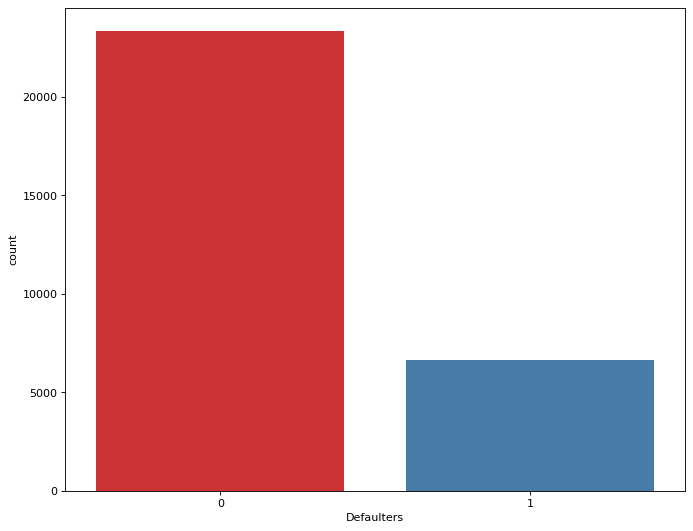

In [ ]:
# Chart - 1 visualization code

plt.figure(figsize=(10,8),dpi=80)
sns.countplot(x='Defaulters',data=df,palette='Set1')


##### 1. Why did you pick the specific chart?

 The bar chart displays data using a number of bars, each representing a particular category. The height of each bar is proportional to a specific aggregation (for example the sum of the values in the category it represents). The categories could be something like an age group or a geographical location. It is also possible to color or split each bar into another categorical column in the data, which enables you to see the contribution from different categories to each bar or group of bars in the bar chart.

##### 2. What is/are the insight(s) found from the chart?

We can see that we have quite imbalance dataset

#### Chart - 2  -- ploting count plot of  categorical df

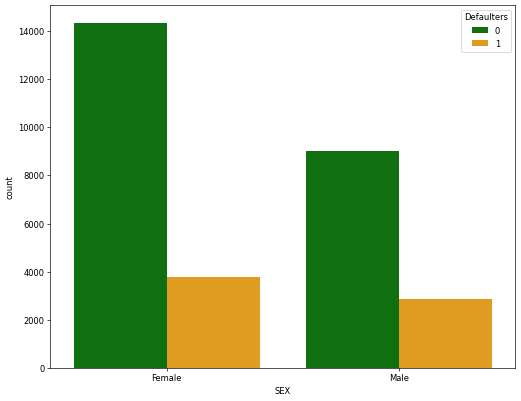

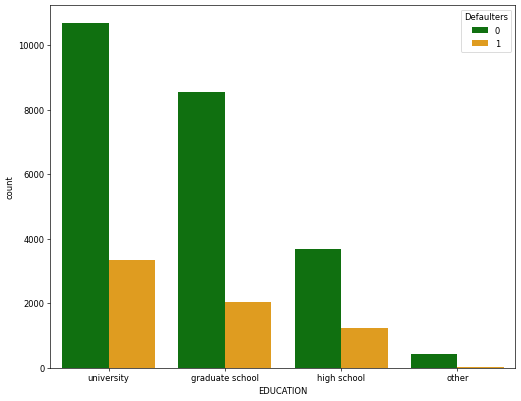

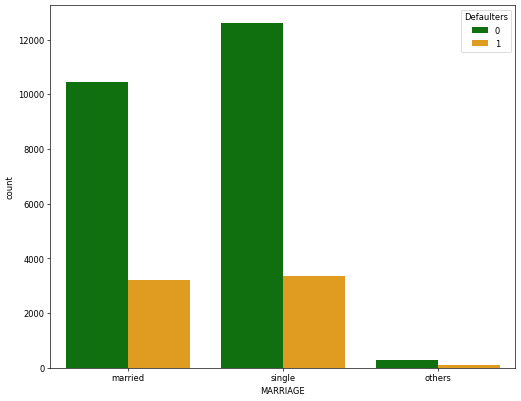

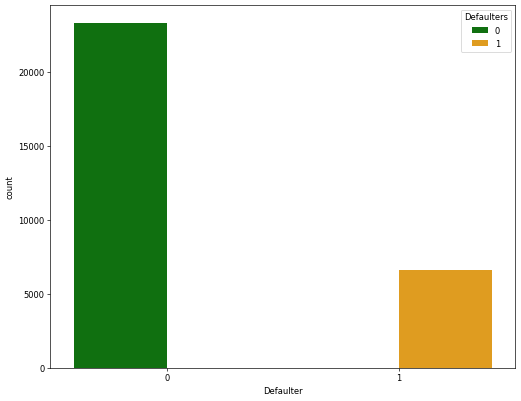

In [ ]:
# Chart - 2 visualization code
for column_name in df_cat.columns:
  plt.figure(figsize=(10,8),dpi=60)
  sns.countplot(x=column_name,data=df_cat,hue=df['Defaulters'],palette=["green",'orange'])
  plt.show()

##### 1. Why did you pick the specific chart?

countplot() method is used to Show the counts of observations in each categorical bin using bars. Parameters : This method is accepting the following parameters that are described below: x, y: This parameter take names of variables in data or vector data, optional, Inputs for plotting long-form data.

##### 2. What is/are the insight(s) found from the chart?

for Sex feature:
  - we can see that  number of females are more than the males
  - but the default ratio of male is quite higher than female

for Education feature:
  - university and High School pesons are more likely to be defaulter in comparison with  the graduate school persons.

for Marriage feature:
  - people who are not married nor single are more likely to make default of bills in comparison with single and married person

#### Chart - 3  -- visualizing age group

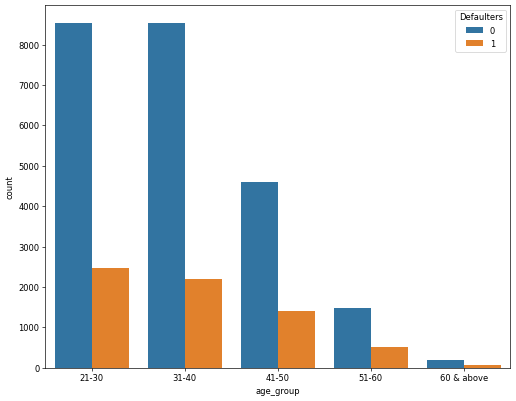

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(10,8),dpi=60)
sns.countplot(x=df['age_group'].sort_values(),data=df,hue='Defaulters')

##### 1. Why did you pick the specific chart?

countplot() method is used to Show the counts of observations in each categorical bin using bars. Parameters : This method is accepting the following parameters that are described below: x, y: This parameter take names of variables in data or vector data, optional, Inputs for plotting long-form data.

##### 2. What is/are the insight(s) found from the chart?

In aur dataset we can clearly see that most of the credit card holder are of age between 21 to 40 , so we can say that company's target customer are mostly youngster.

#### Chart - 4  -- plotting histogram of numeric_features in dataset

In [ ]:
#extracting numeric columns
numeric_features= df.select_dtypes(exclude='object')

In [ ]:
numeric_features

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  PAY_SEPT  PAY_AUG  PAY_JUL  \
0          1      20000    2          2         1         2        2       -1   
1          2     120000    2          2         2        -1        2        0   
2          3      90000    2          2         2         0        0        0   
3          4      50000    2          2         1         0        0        0   
4          5      50000    1          2         1        -1        0       -1   
...      ...        ...  ...        ...       ...       ...      ...      ...   
29995  29996     220000    1          3         1         0        0        0   
29996  29997     150000    1          3         2        -1       -1       -1   
29997  29998      30000    1          2         2         4        3        2   
29998  29999      80000    1          3         1         1       -1        0   
29999  30000      50000    1          2         1         0        0        0   

       PAY_JUN  PAY_MAY  ...  BILL_AMT_JUL  BILL_AMT_JUN  BILL_AMT_APR  \
0           -1       -2  ...           689             0             0   
1            0        0  ...          2682          3272          3261   
2            0        0  ...         13559         14331         15549   
3            0        0  ...         49291         28314         29547   
4            0        0  ...         35835         20940         19131   
...        ...      ...  ...           ...           ...           ...   
29995        0        0  ...        208365         88004         15980   
29996       -1        0  ...          3502          8979             0   
29997       -1        0  ...          2758         20878         19357   
29998        0        0  ...         76304         52774         48944   
29999        0        0  ...         49764         36535         15313   

       PAY_AMT_SEPT  PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  \
0                 0          689            0            0            0   
1                 0         1000         1000         1000            0   
2              1518         1500         1000         1000         1000   
3              2000         2019         1200         1100         1069   
4              2000        36681        10000         9000          689   
...             ...          ...          ...          ...          ...   
29995          8500        20000         5003         3047         5000   
29996          1837         3526         8998          129            0   
29997             0            0        22000         4200         2000   
29998         85900         3409         1178         1926        52964   
29999          2078         1800         1430         1000         1000   

       PAY_AMT_APR  Defaulters  
0                0           1  
1             2000           1  
2             5000           0  
3             1000           0  
4              679           0  
...            ...         ...  
29995         1000           0  
29996            0           0  
29997         3100           1  
29998         1804           1  
29999         1000           1  

[30000 rows x 22 columns]

In [ ]:
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   ID             30000 non-null  int64
 1   LIMIT_BAL      30000 non-null  int64
 2   SEX            30000 non-null  int64
 3   EDUCATION      30000 non-null  int64
 4   MARRIAGE       30000 non-null  int64
 5   PAY_SEPT       30000 non-null  int64
 6   PAY_AUG        30000 non-null  int64
 7   PAY_JUL        30000 non-null  int64
 8   PAY_JUN        30000 non-null  int64
 9   PAY_MAY        30000 non-null  int64
 10  PAY_APR        30000 non-null  int64
 11  BILL_AMT_SEPT  30000 non-null  int64
 12  BILL_AMT_JUL   30000 non-null  int64
 13  BILL_AMT_JUN   30000 non-null  int64
 14  BILL_AMT_APR   30000 non-null  int64
 15  PAY_AMT_SEPT   30000 non-null  int64
 16  PAY_AMT_AUG    30000 non-null  int64
 17  PAY_AMT_JUL    30000 non-null  int64
 18  PAY_AMT_JUN    30000 non-null  int64
 19  PAY_

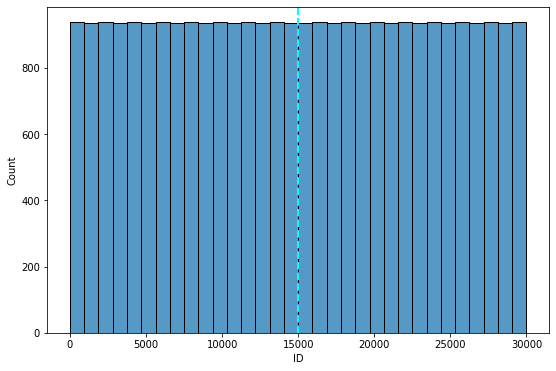

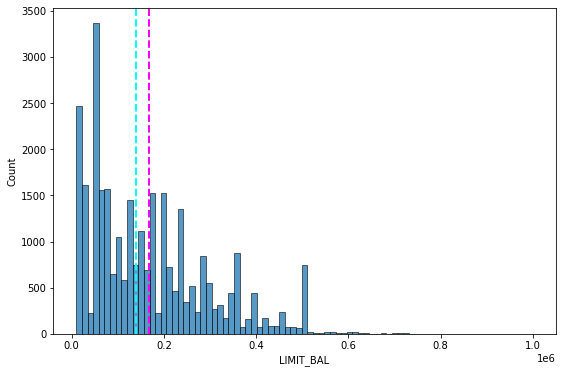

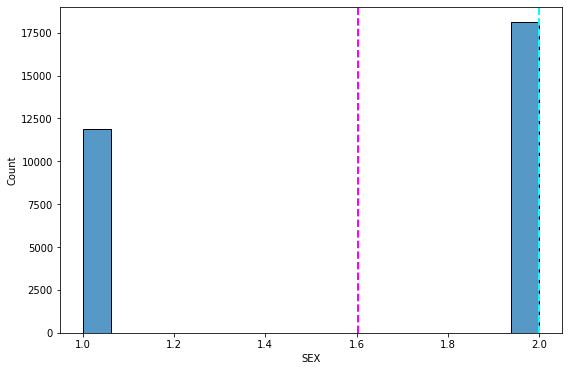

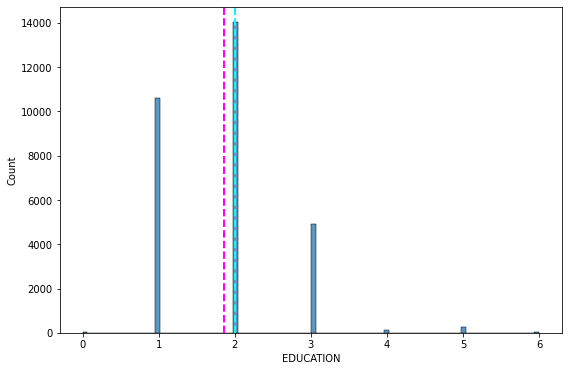

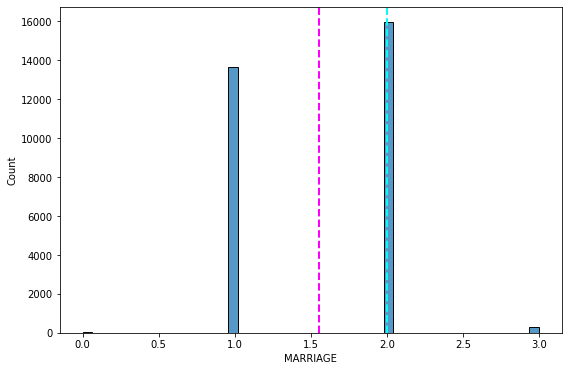

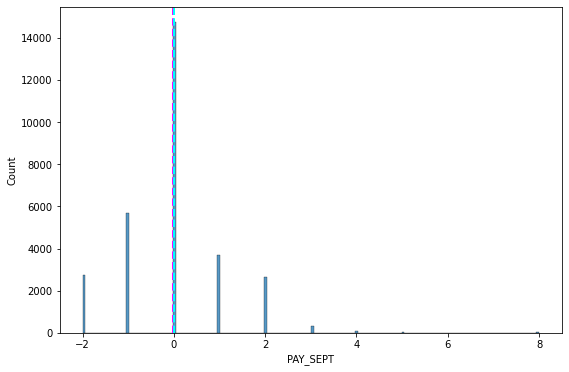

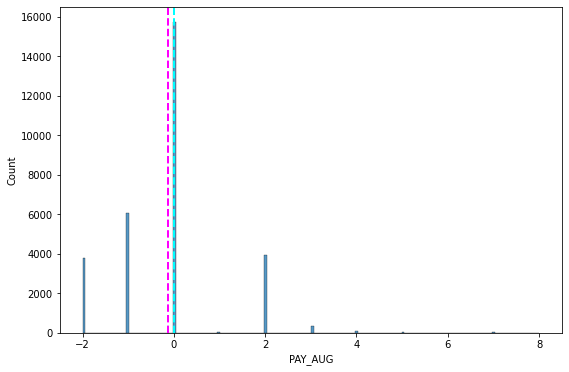

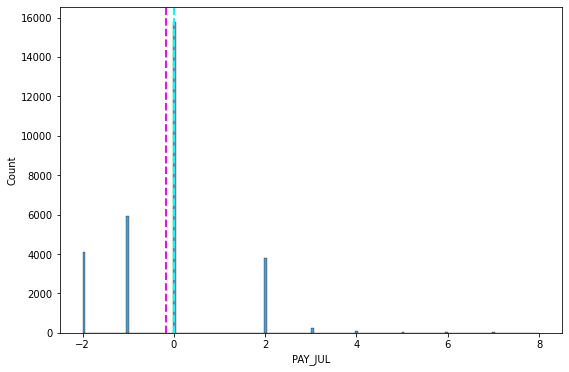

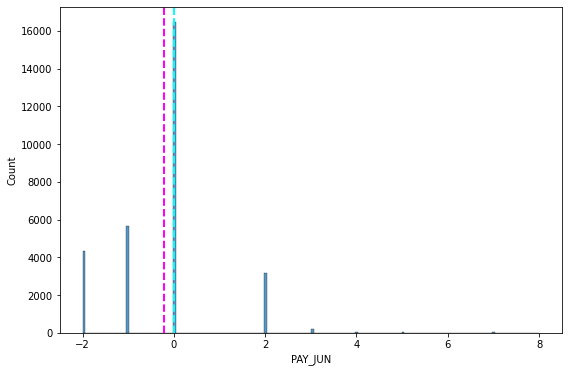

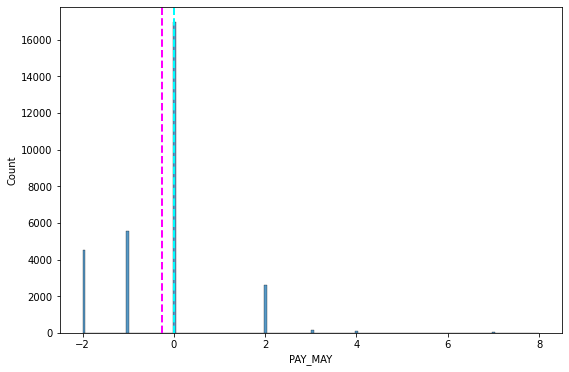

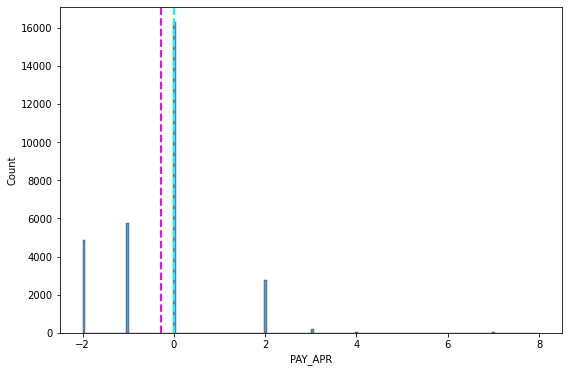

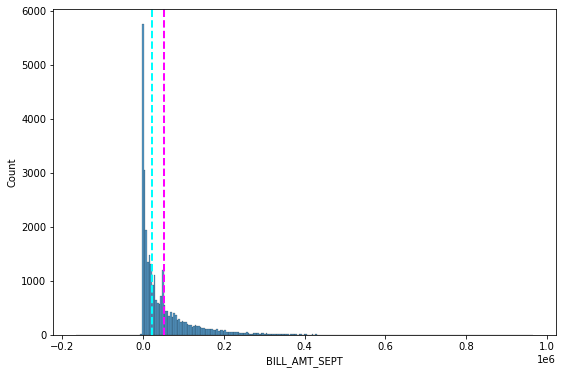

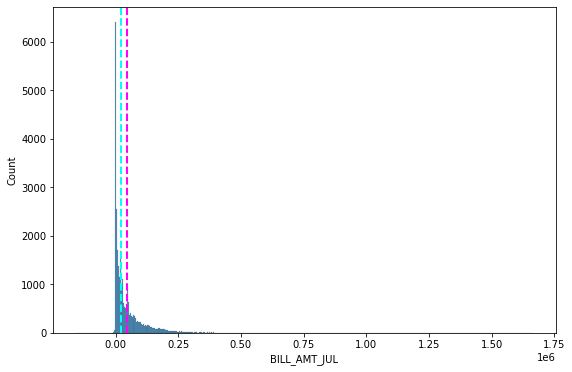

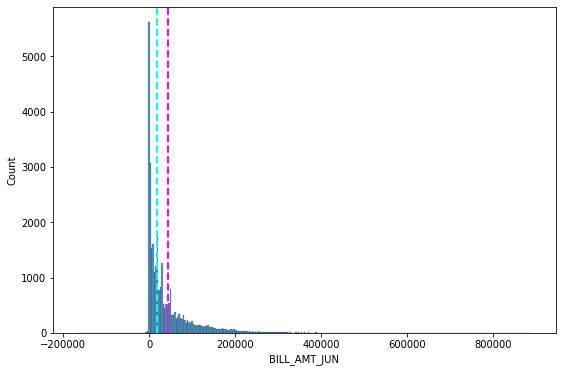

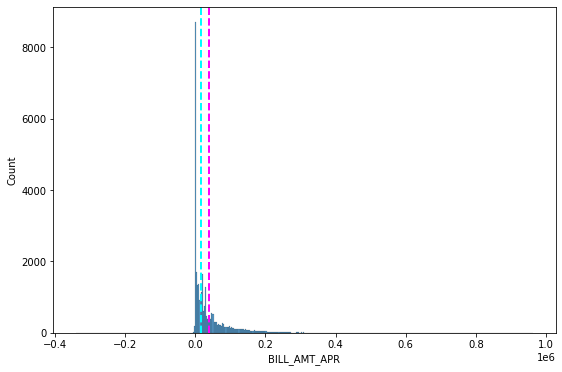

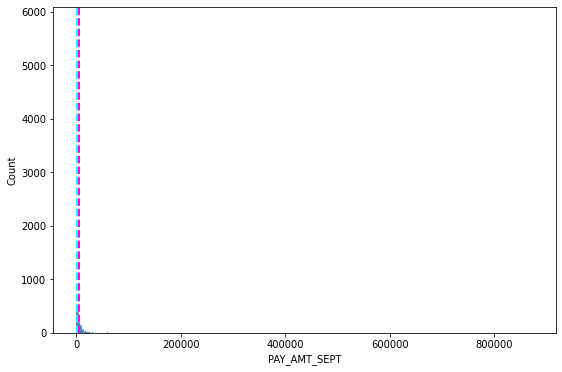

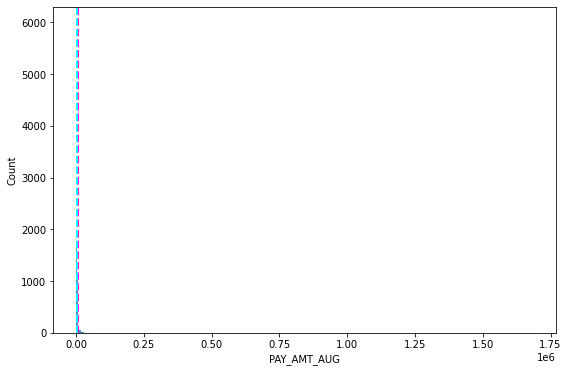

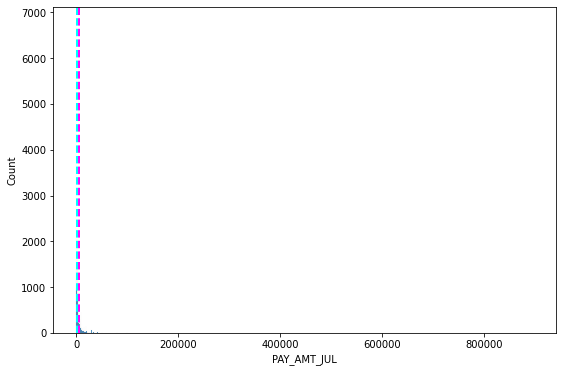

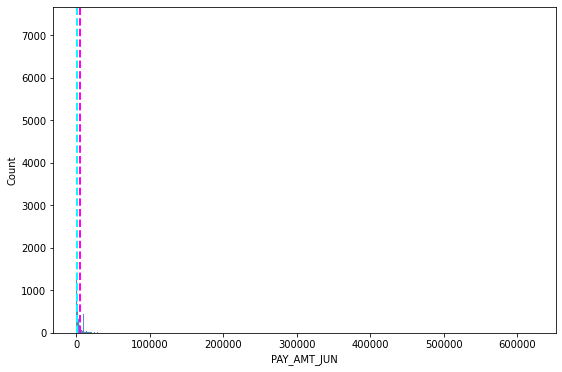

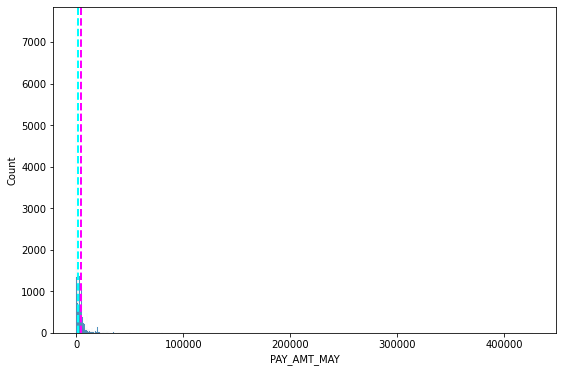

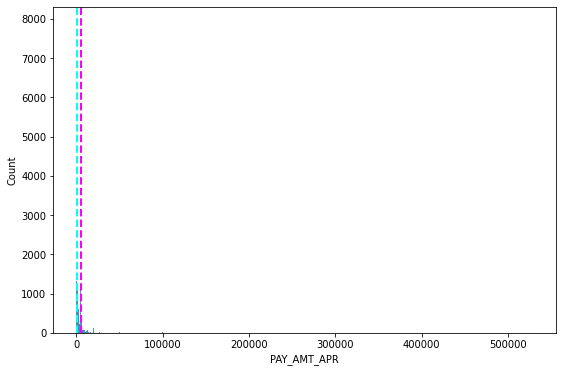

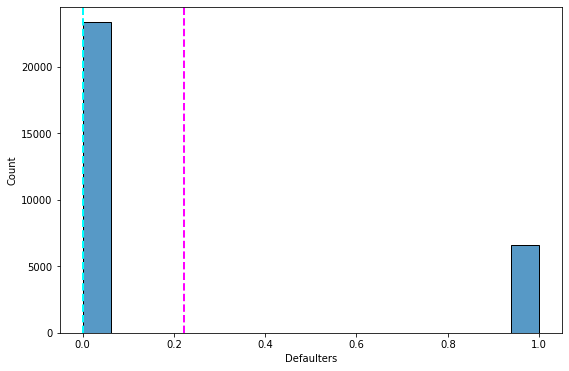

In [ ]:
# Chart - 4 visualization code
for col in numeric_features[:]:
  fig = plt.figure(figsize=(9, 6))
  sns.histplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)   
  plt.show()

##### 1. Why did you pick the specific chart?

The histogram is a popular graphing tool. It is used to summarize discrete or continuous data that are measured on an interval scale. It is often used to illustrate the major features of the distribution of the data in a convenient form.

#### Chart - 5 -- ploting Regression plot of each columns of dataset v/s Defaulters  columns

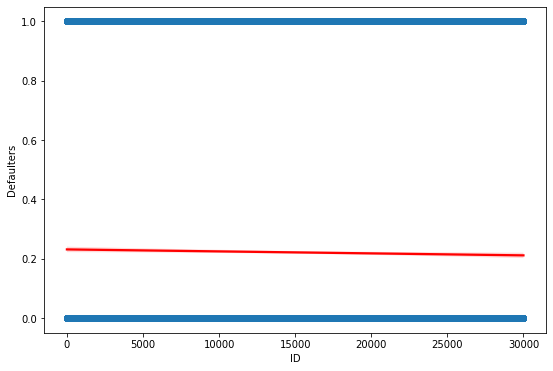

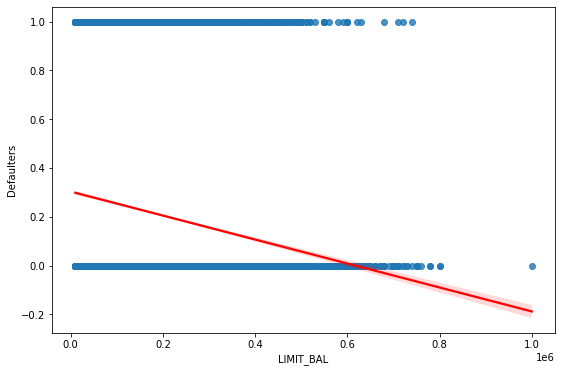

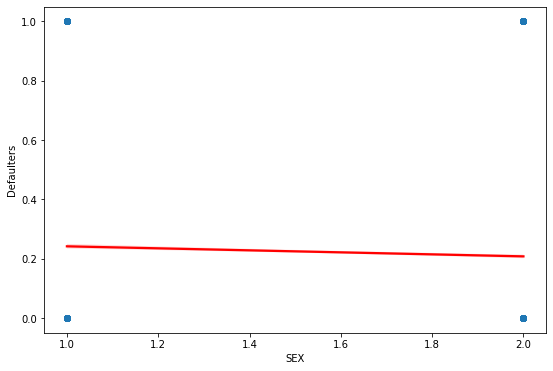

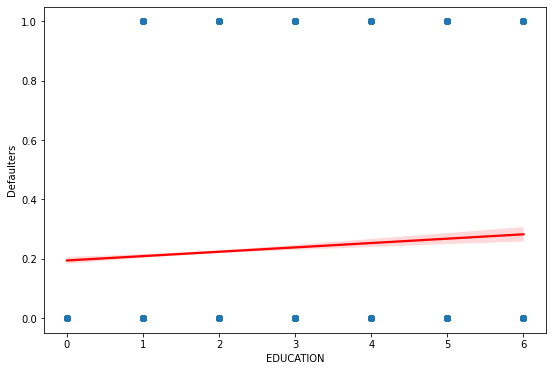

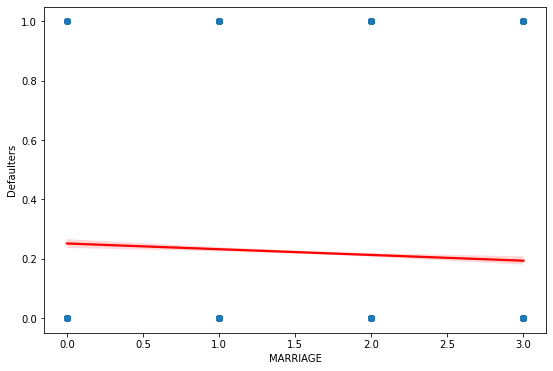

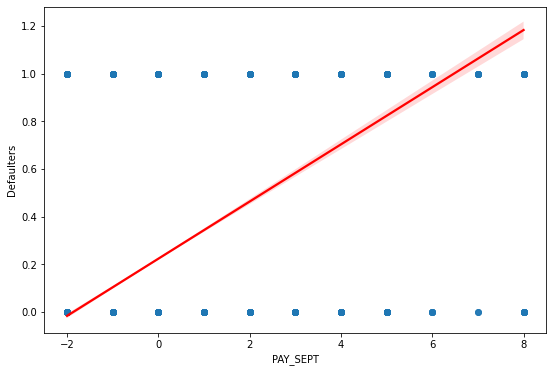

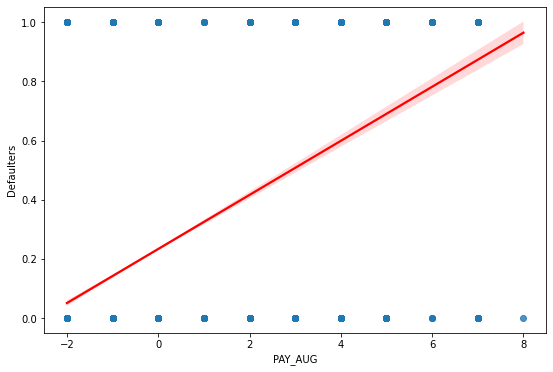

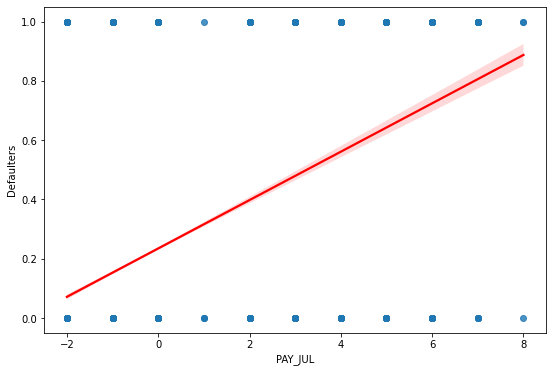

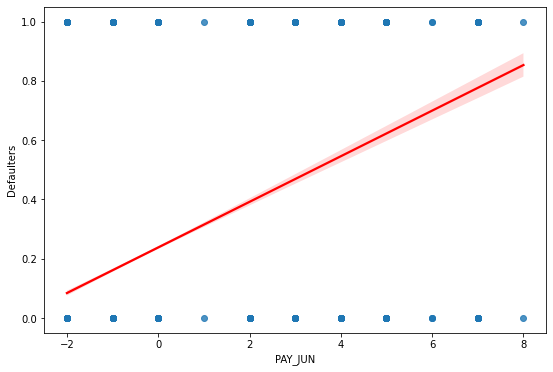

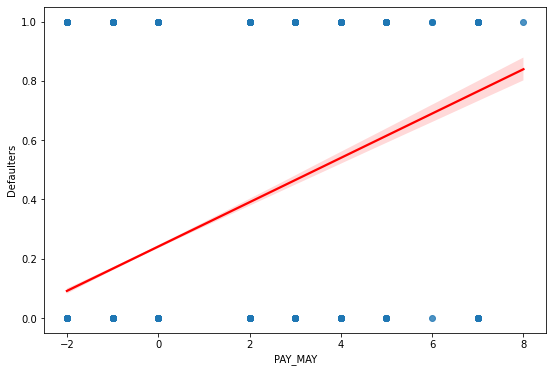

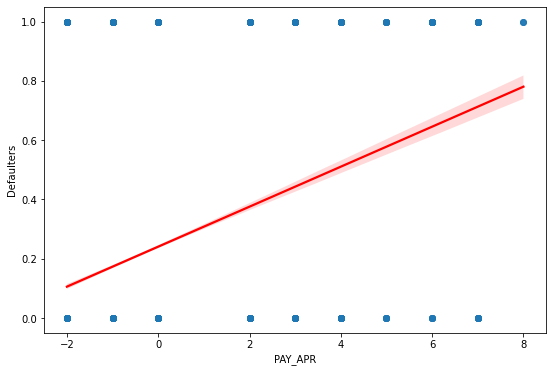

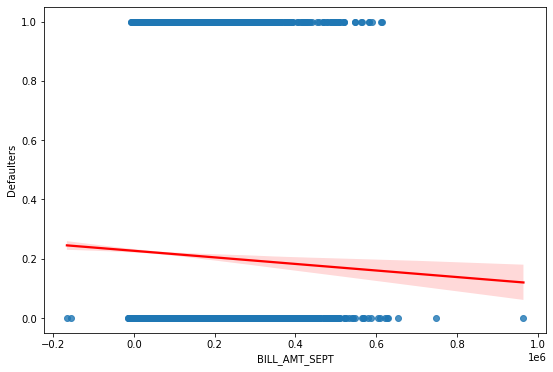

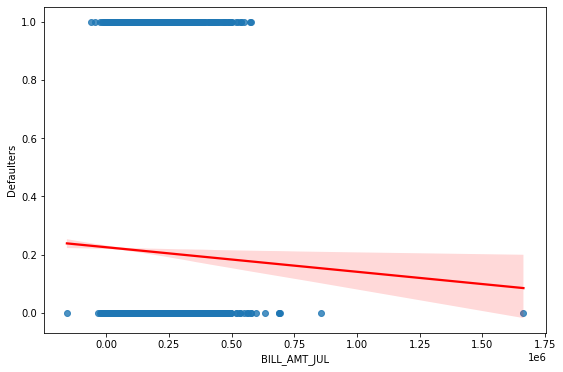

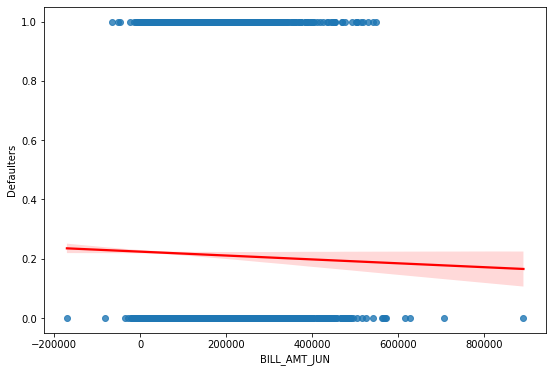

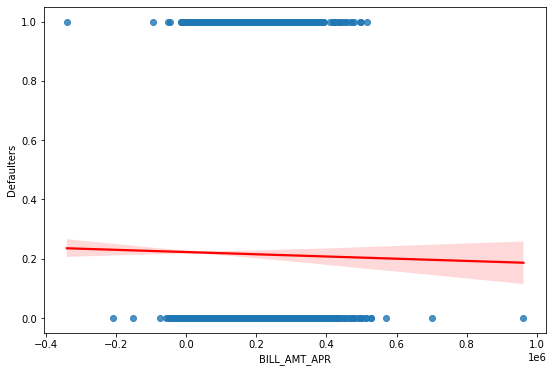

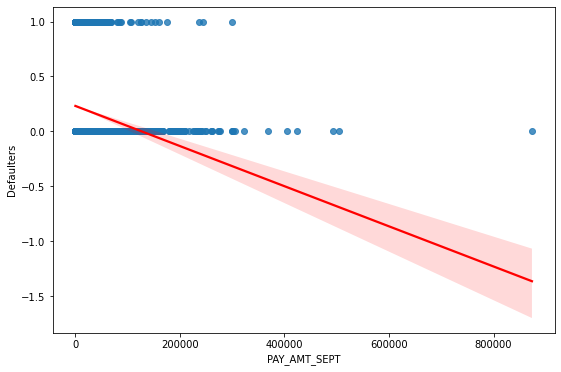

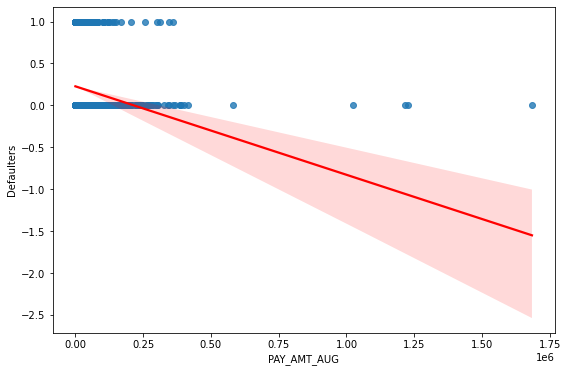

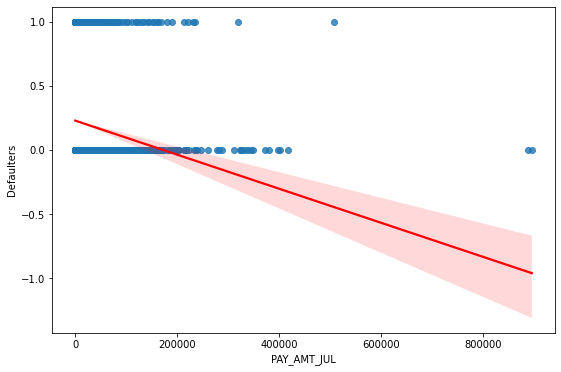

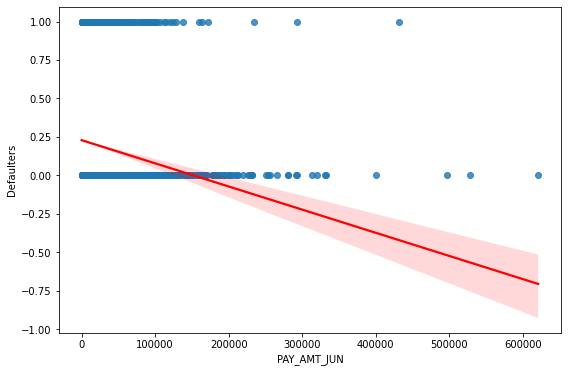

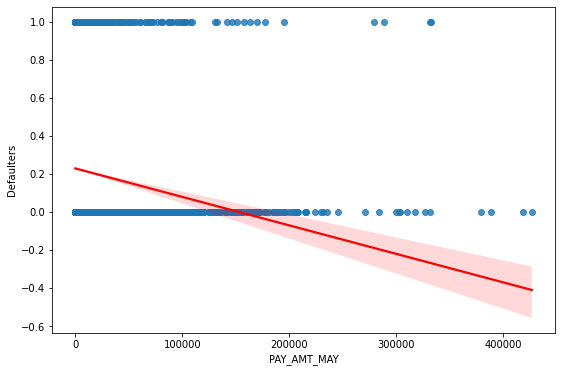

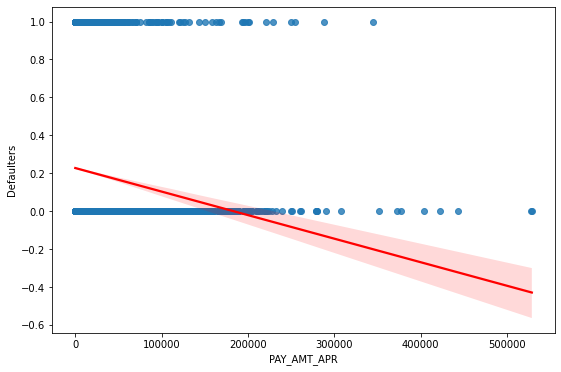

<Figure size 648x432 with 0 Axes>

In [ ]:
# Chart - 5 visualization code
# ploting Regression plot of each columns of dataset v/s Defaulters columns
for col in numeric_features[:]:
  fig = plt.figure(figsize=(9, 6))
  if col == 'Defaulters':
    pass
  else:
    sns.regplot(x=df[col],y=df["Defaulters"],line_kws={"color": "red"})
  
  plt.show()

##### 1. Why did you pick the specific chart?

Regression analysis is a powerful statistical method that allows you to examine the relationship between two or more variables of interest. While there are many types of regression analysis, at their core they all examine the influence of one or more independent variables on a dependent variable.

#### Chart - 6 -- Bar plot on Hour  to get more information

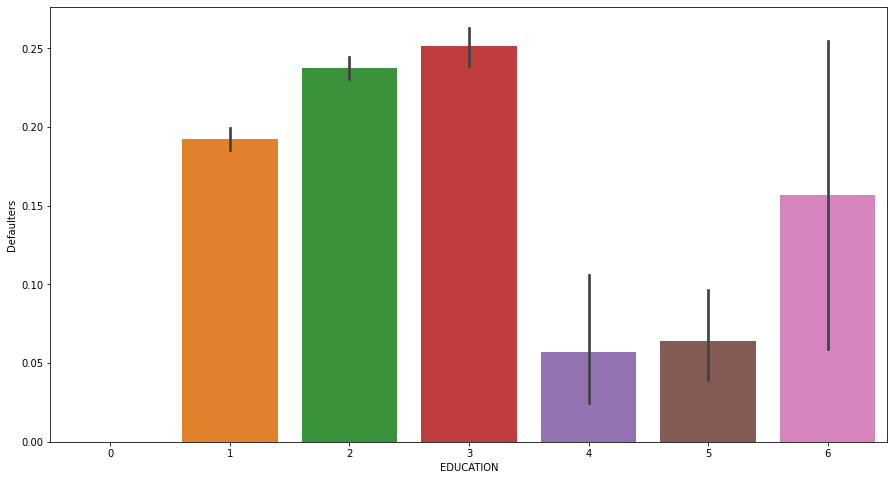

In [ ]:
# Chart - 6 visualization code



plt.figure(figsize=(15,8))
sns.barplot(x='EDUCATION', y='Defaulters' ,data=df); 

##### 1. Why did you pick the specific chart?

A bar plot or bar chart is a graph that represents the category of data with rectangular bars with lengths and heights that is proportional to the values which they represent. The bar plots can be plotted horizontally or vertically. A bar chart describes the comparisons between the discrete categories. One of the axis of the plot represents the specific categories being compared, while the other axis represents the measured values corresponding to those categories.

##### 2. What is/are the insight(s) found from the chart?

Education (1 = graduate school; 2 = university; 3 = high school; 4,5,6 = others.

In aur dataset we can clearly see that most of the credit card holder are of education between graduate school and university  , so we can say that company's target customer are mostly youngster.


#### Chart - 7

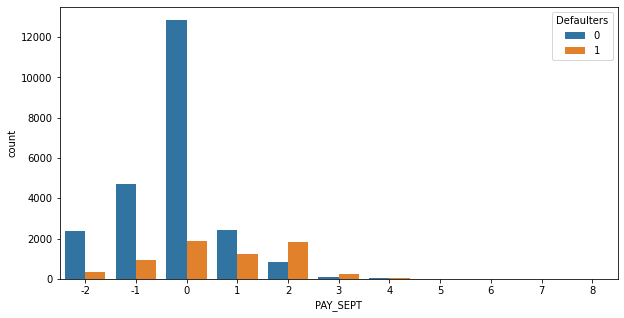

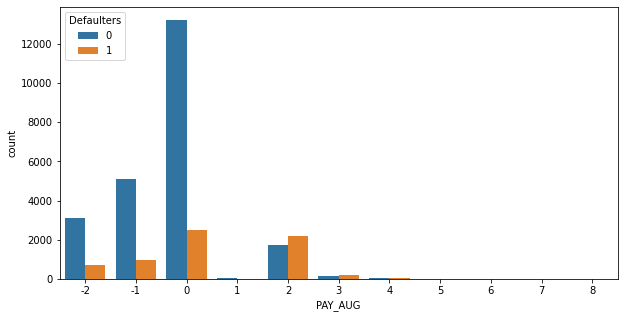

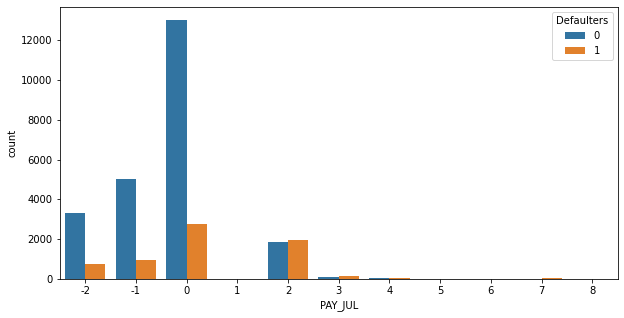

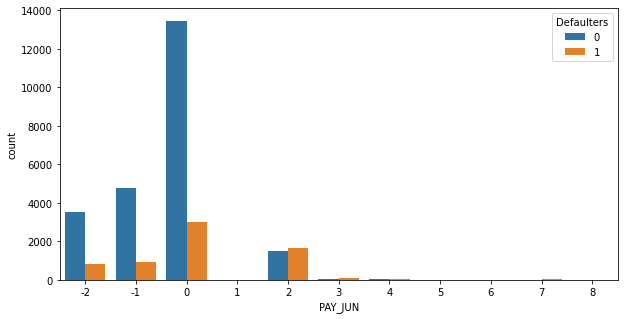

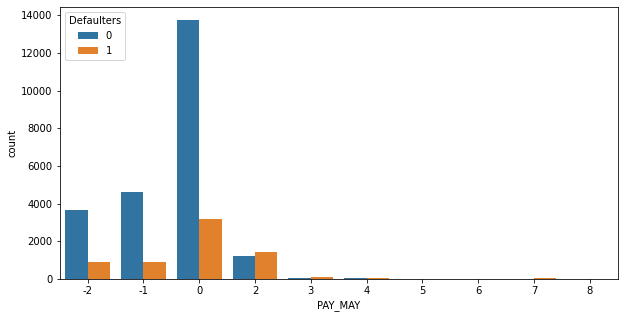

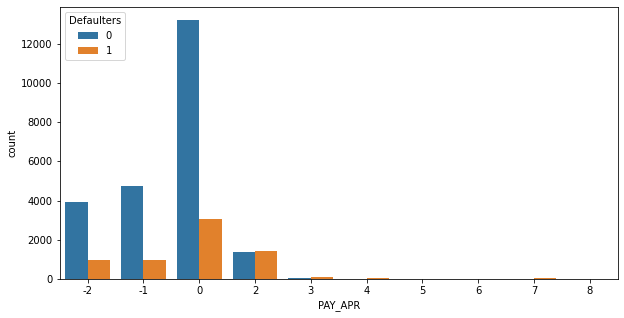

In [ ]:
# Chart - 7 visualization code
#Payment delay

pay_col = ['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'Defaulters', data = df)

#### Chart - 14 - Correlation Heatmap

**Multicollinearity occurs when two or more independent variables(also known as predictor) are highly correlated with one another in a regression model.**

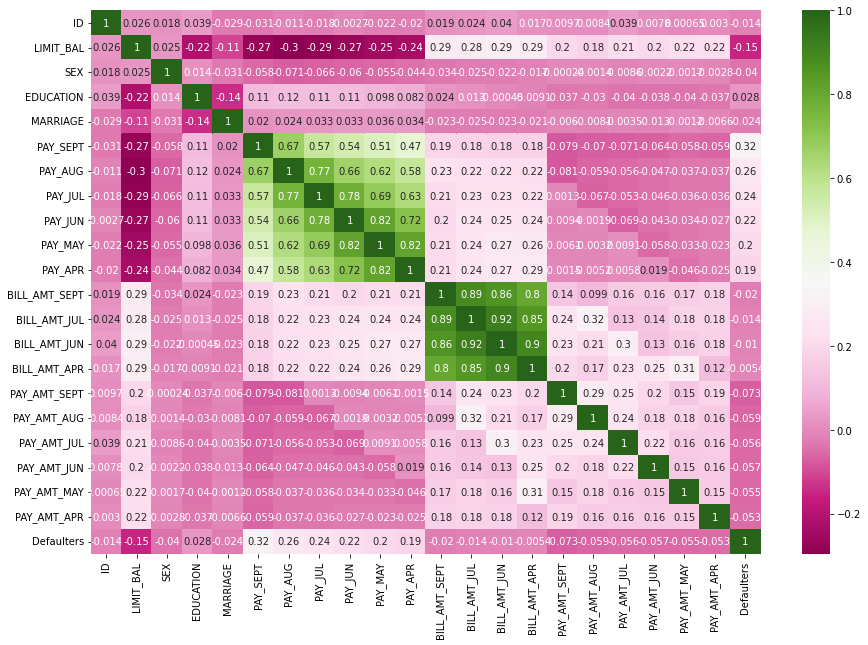

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='PiYG',annot=True)

In [ ]:
corr = df.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

##### 1. Why did you pick the specific chart?

A heat map is a two-dimensional representation of data in which values are represented by colors. A simple heat map provides an immediate visual summary of information. More elaborate heat maps allow the viewer to understand complex data sets.

A heat map represents these coefficients to visualize the strength of correlation among variables. It helps find features that are best for Machine Learning model building. The heat map transforms the correlation matrix into color coding

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

From the above correlation heatmap, we can see Payment delay['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR'] and Bill Statement ['BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR'] are positiveliy highly correlated with a value of 1.

#### Chart - 15 - Pair Plot 

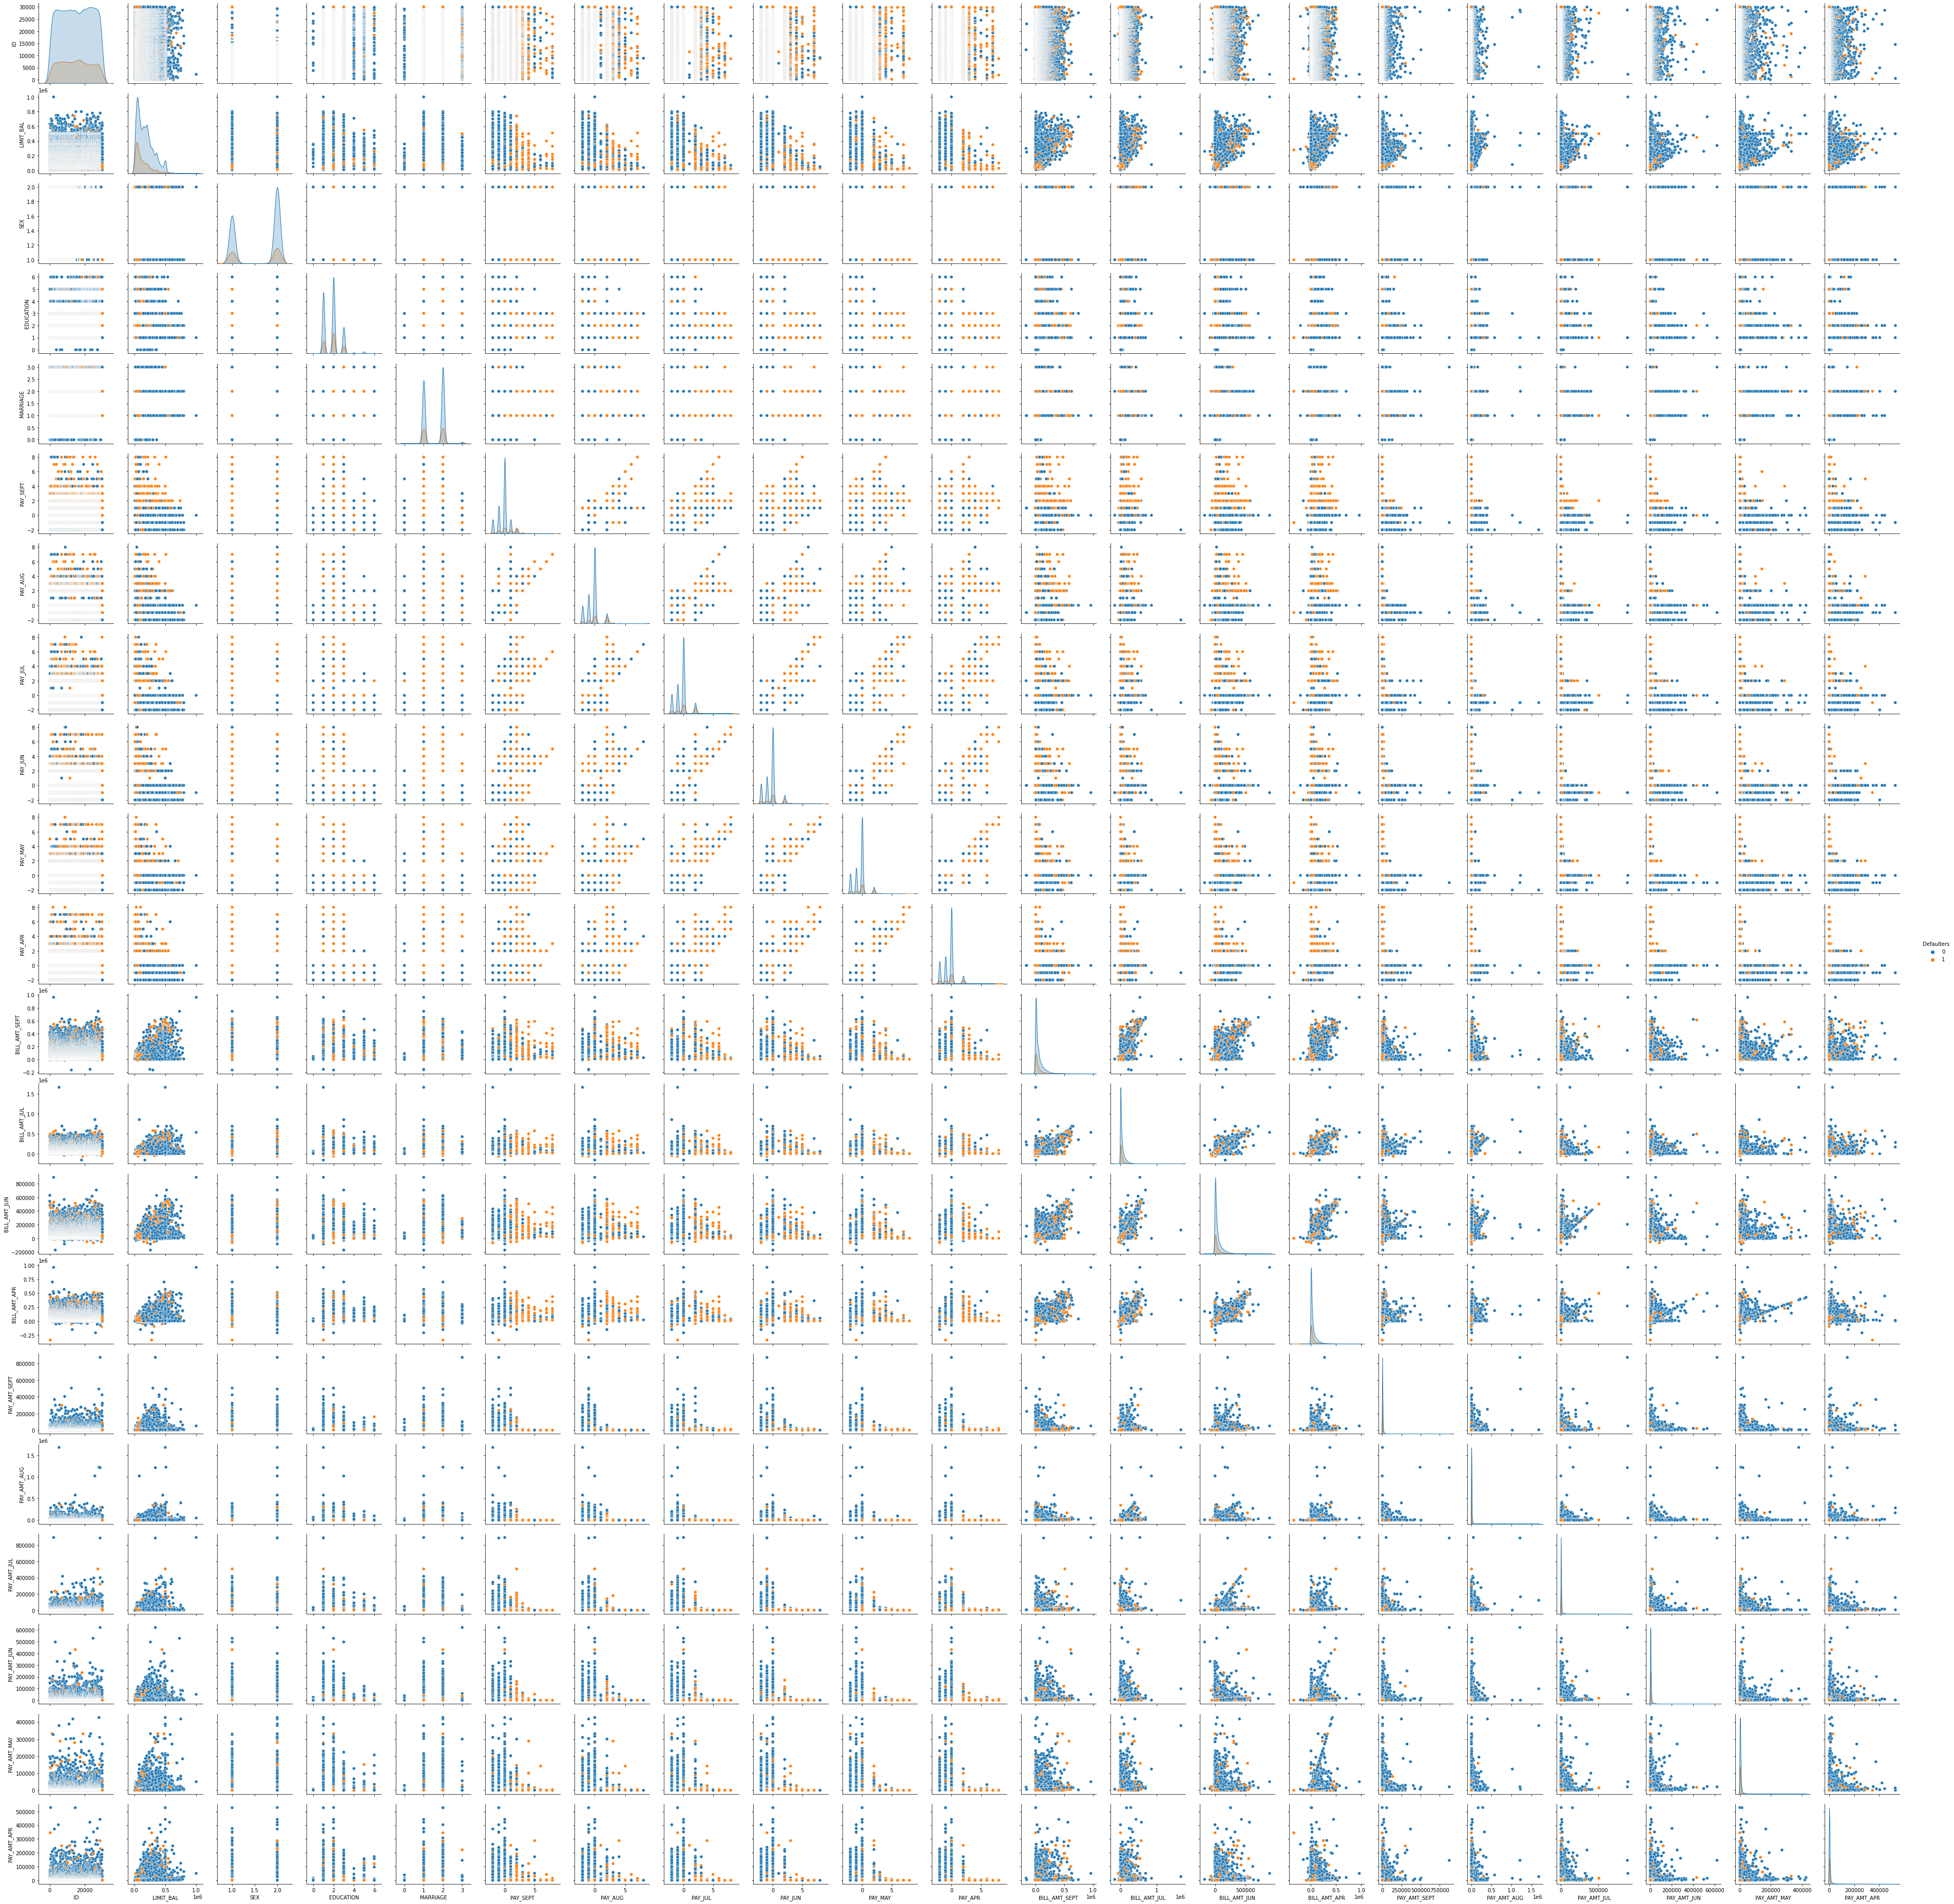

In [ ]:
# Pair Plot visualization code
sns.pairplot(df, hue="Defaulters")

##### 1. Why did you pick the specific chart?


Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

**No null value found**

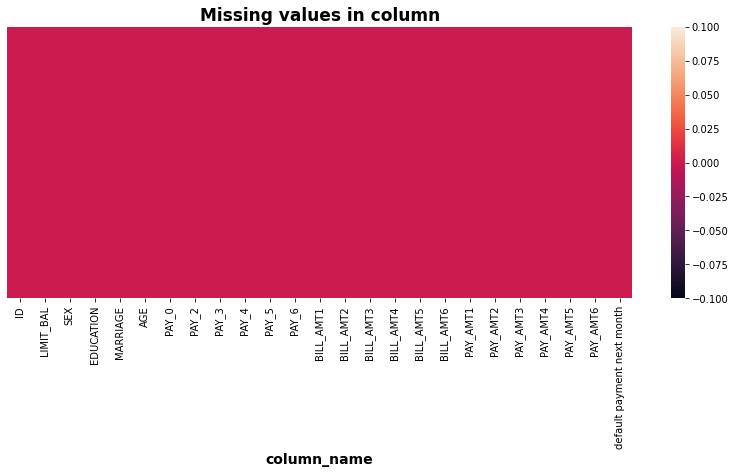

In [ ]:
# Visualizing the missing values
 # Checking Null Value by plotting Heatmap
plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("Missing values in column",fontweight="bold",size=17)
plt.show()

#### What all missing value imputation techniques have you used and why did you use those techniques?

**There are no missing values to handle in the given dataset.**

**### 2. Handling Outliers**

**Outliers can occur due to various reasons, including data entry errors, measurement errors, natural variation, or the presence of rare events. They can affect statistical measures such as the mean and standard deviation, leading to biased or misleading results if not properly handled.**

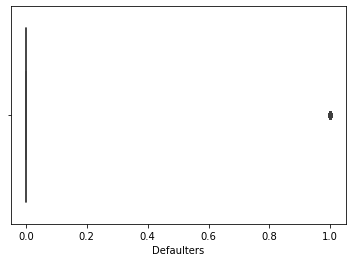

In [ ]:
#checking outliers in Defaulters
sns.boxplot(df['Defaulters'])

In [ ]:
# Handling Outliers & Outlier treatments
max_thresold = df['Defaulters'].quantile(0.95)
max_thresold

1.0

In [ ]:

df[df['Defaulters']>max_thresold]

Empty DataFrame
Columns: [ID, LIMIT_BAL, SEX, EDUCATION, MARRIAGE, PAY_SEPT, PAY_AUG, PAY_JUL, PAY_JUN, PAY_MAY, PAY_APR, BILL_AMT_SEPT, BILL_AMT_AUG, BILL_AMT_JUL, BILL_AMT_JUN, BILL_AMT_MAY, BILL_AMT_APR, PAY_AMT_SEPT, PAY_AMT_AUG, PAY_AMT_JUL, PAY_AMT_JUN, PAY_AMT_MAY, PAY_AMT_APR, Defaulters, age_group]
Index: []

[0 rows x 25 columns]

In [ ]:
min_thresold = df['Defaulters'].quantile(0.05)
min_thresold

0.0

In [ ]:
df[df['Defaulters']<min_thresold]


Empty DataFrame
Columns: [ID, LIMIT_BAL, SEX, EDUCATION, MARRIAGE, PAY_SEPT, PAY_AUG, PAY_JUL, PAY_JUN, PAY_MAY, PAY_APR, BILL_AMT_SEPT, BILL_AMT_AUG, BILL_AMT_JUL, BILL_AMT_JUN, BILL_AMT_MAY, BILL_AMT_APR, PAY_AMT_SEPT, PAY_AMT_AUG, PAY_AMT_JUL, PAY_AMT_JUN, PAY_AMT_MAY, PAY_AMT_APR, Defaulters, age_group]
Index: []

[0 rows x 25 columns]

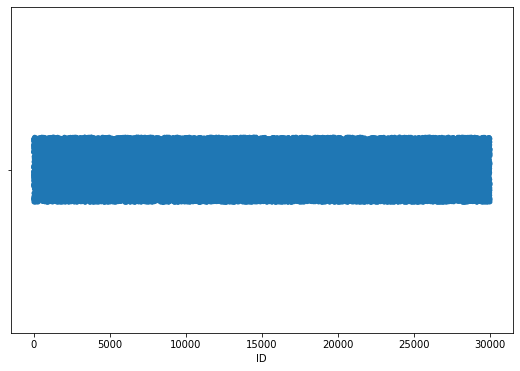

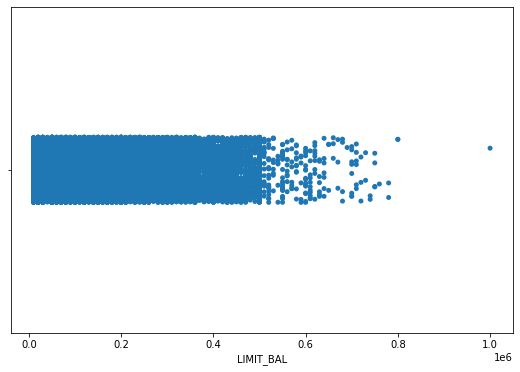

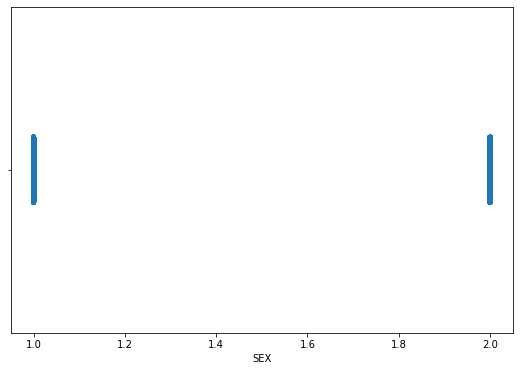

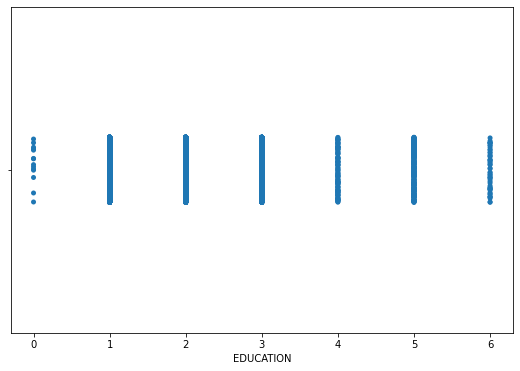

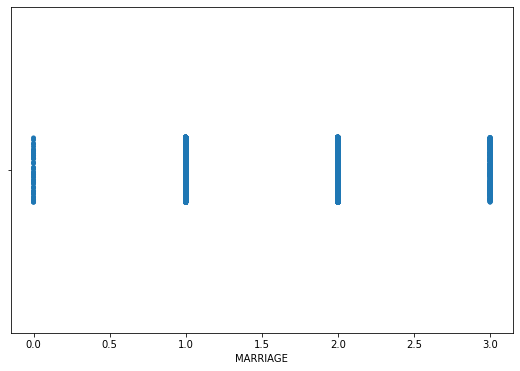

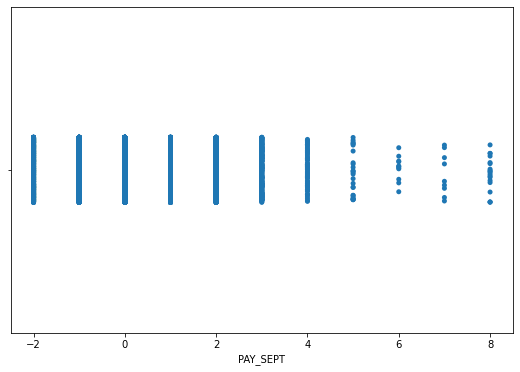

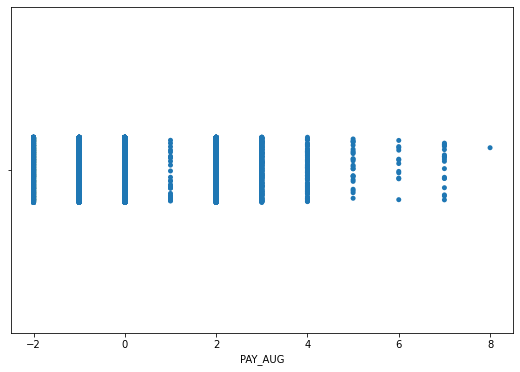

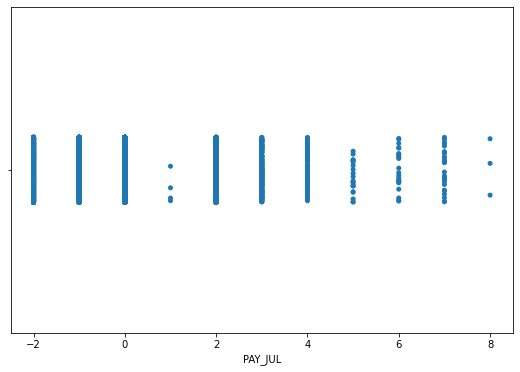

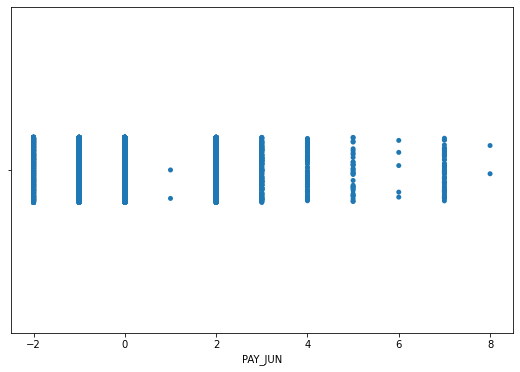

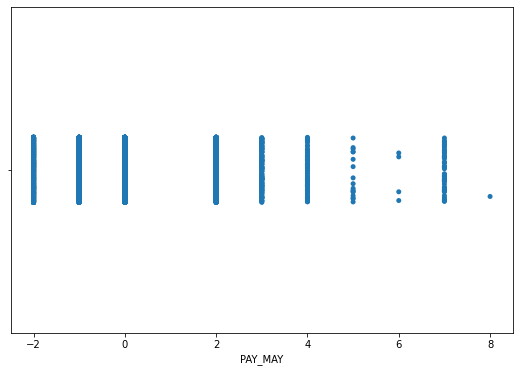

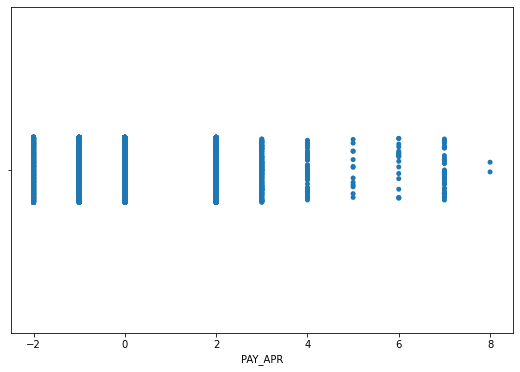

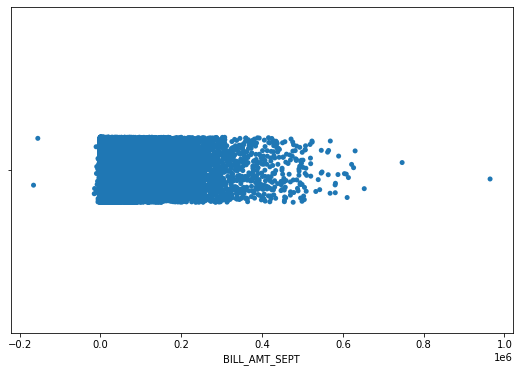

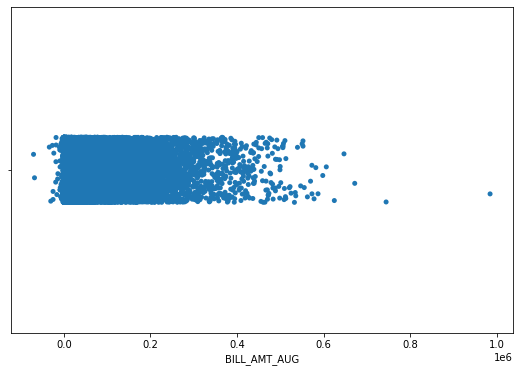

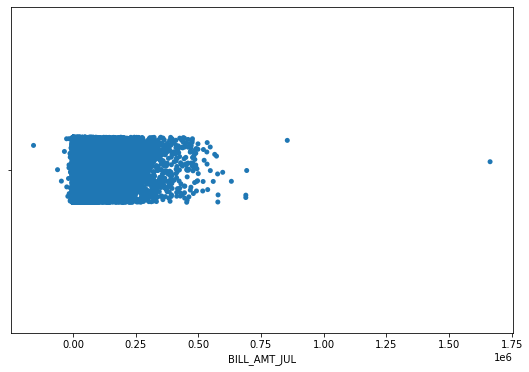

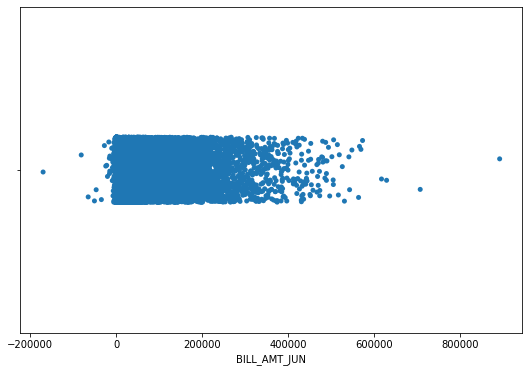

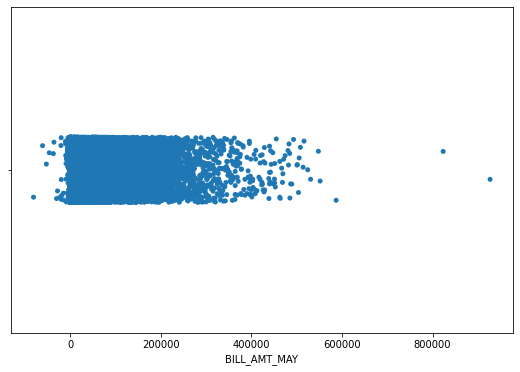

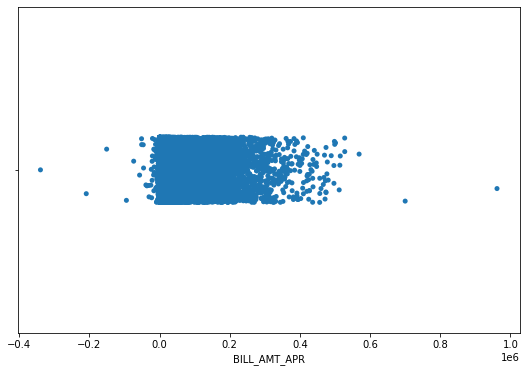

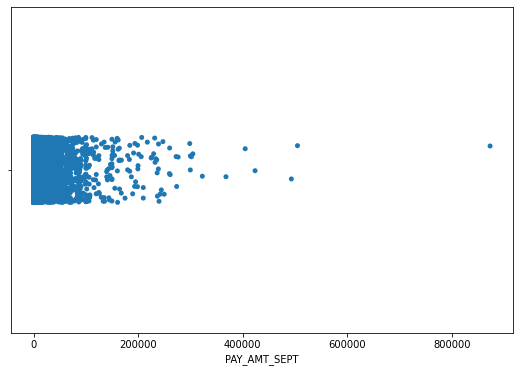

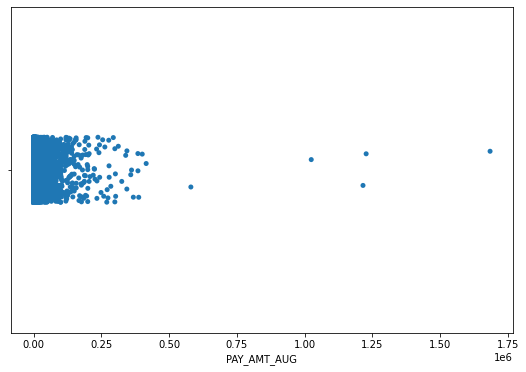

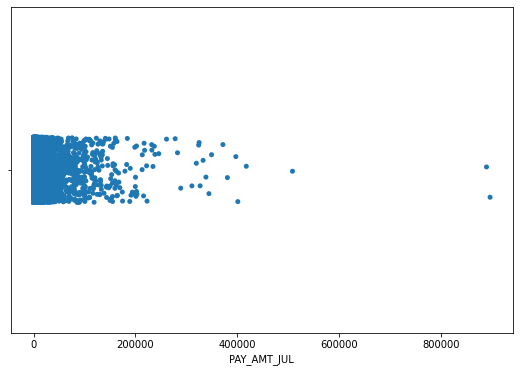

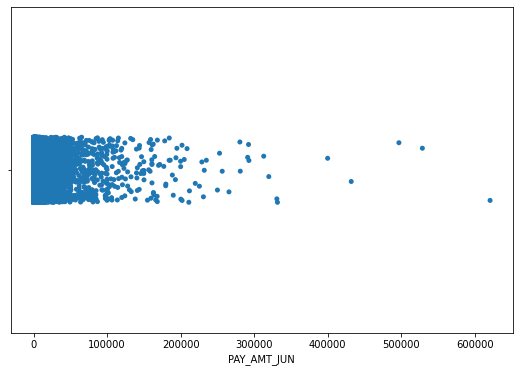

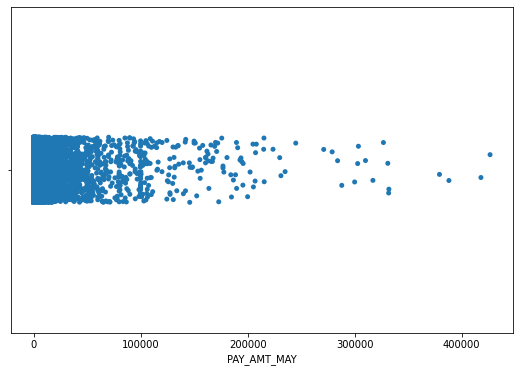

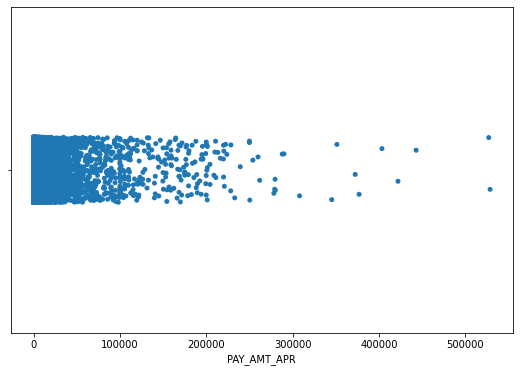

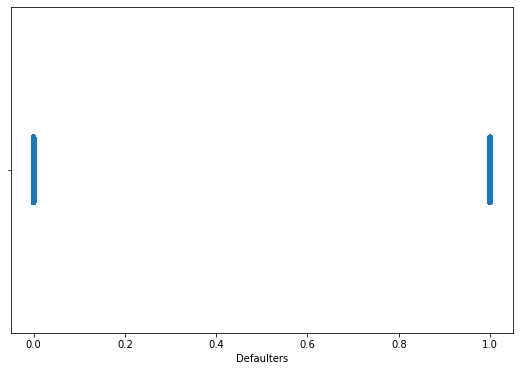

In [ ]:
# Visualising  code for the numerical columns 
for col in df.describe().columns:
  fig=plt.figure(figsize=(9,6))
  sns.stripplot(df[col])

##### What all outlier treatment techniques have you used and why did you use those techniques?

The box plot is a useful graphical display for describing the behavior of the data in the middle as well as at the ends of the distributions. The box plot uses the median and the lower and upper quartiles (defined as the 25th and 75th percentiles). If the lower quartile is Q1 and the upper quartile is Q3, then the difference (Q3 — Q1) is called the interquartile range or IQ. A box plot is constructed by drawing a box between the upper and lower quartiles with a solid line drawn across the box to locate the median. The following quantities (called fences) are needed for identifying extreme values in the tails of the distribution:

The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers. where Q1 and Q3 are the 25th and 75th percentile of the dataset respectively, and IQR represents the inter-quartile range and given by Q3 – Q1. For Other distributions: Use percentile-based approach

lower inner fence: Q1–1.5*IQ
upper inner fence: Q3 + 1.5*IQ
lower outer fence: Q1–3*IQ
upper outer fence: Q3 + 3*IQ

**Detecting and Removing outliers using Percentiles**

### 3. Categorical Encoding

In [ ]:
df.head(5)

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  PAY_SEPT  PAY_AUG  PAY_JUL  \
0   1      20000    2          2         1         2        2       -1   
1   2     120000    2          2         2        -1        2        0   
2   3      90000    2          2         2         0        0        0   
3   4      50000    2          2         1         0        0        0   
4   5      50000    1          2         1        -1        0       -1   

   PAY_JUN  PAY_MAY  ...  BILL_AMT_MAY  BILL_AMT_APR  PAY_AMT_SEPT  \
0       -1       -2  ...             0             0             0   
1        0        0  ...          3455          3261             0   
2        0        0  ...         14948         15549          1518   
3        0        0  ...         28959         29547          2000   
4        0        0  ...         19146         19131          2000   

   PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  PAY_AMT_APR  \
0          689            0            0            0            0   
1         1000         1000         1000            0         2000   
2         1500         1000         1000         1000         5000   
3         2019         1200         1100         1069         1000   
4        36681        10000         9000          689          679   

   Defaulters  age_group  
0           1      21-30  
1           1      21-30  
2           0      31-40  
3           0      31-40  
4           0      51-60  

[5 rows x 25 columns]

### 4. Feature Manipulation & Selection

#### 2. Feature Selection

A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. Multicollinearity exists when there is a correlation between multiple independent variables in a multiple regression model. This can adversely affect the regression results. Thus, the variance inflation factor can estimate how much the variance of a regression coefficient is inflated due to multicollinearity.

In [ ]:
# Select your features wisely to avoid overfitting
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Defaulters']]])

variables        VIF
0              ID   3.765102
1       LIMIT_BAL   3.667859
2             SEX   8.397758
3       EDUCATION   5.250922
4        MARRIAGE   6.335045
5        PAY_SEPT   1.916412
6         PAY_AUG   3.212737
7         PAY_JUL   3.719851
8         PAY_JUN   4.440613
9         PAY_MAY   4.983827
10        PAY_APR   3.460541
11  BILL_AMT_SEPT  10.001293
12   BILL_AMT_JUL  24.116894
13   BILL_AMT_JUN  22.820653
14   BILL_AMT_APR  10.968180
15   PAY_AMT_SEPT   1.398489
16    PAY_AMT_AUG   1.907903
17    PAY_AMT_JUL   1.901830
18    PAY_AMT_JUN   1.430571
19    PAY_AMT_MAY   1.476325
20    PAY_AMT_APR   1.255015

In [ ]:
df.drop('BILL_AMT_AUG', inplace=True, axis=1)

In [ ]:
df.drop('BILL_AMT_MAY', inplace=True, axis=1)

In [ ]:

df.drop('BILL_AMT_JUL', inplace=True, axis=1)

In [ ]:
df.drop('ID', inplace=True, axis=1)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Defaulters']]])

variables        VIF
0      LIMIT_BAL   3.587244
1            SEX   8.066206
2      EDUCATION   4.982920
3       MARRIAGE   6.100308
4       PAY_SEPT   1.913976
5        PAY_AUG   3.178444
6        PAY_JUL   3.705207
7        PAY_JUN   4.432156
8        PAY_MAY   4.968244
9        PAY_APR   3.455840
10  BILL_AMT_JUN  10.727844
11  BILL_AMT_APR  10.881003
12  PAY_AMT_SEPT   1.359632
13   PAY_AMT_AUG   1.276605
14   PAY_AMT_JUL   1.386318
15   PAY_AMT_JUN   1.410618
16   PAY_AMT_MAY   1.472755
17   PAY_AMT_APR   1.247511

**Simply drop those columns whose VIF is greater than 20**

##### What all feature selection methods have you used  and why?

I used Dropping Constant Feature, Dropping columns having multicolinearity and validate through VIF.

Steps for Implementing VIF

• Calculate the VIF factors.

• Inspect the factors for each predictor variable, if the VIF is between 5–10, multicollinearity is likely present and you should consider dropping the variable.

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

VIF=\frac{1}{1-R^2}



In [ ]:
#spliting independent Variable
X=df.drop(['Defaulters'],axis=1)

In [ ]:
X.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  PAY_SEPT  PAY_AUG  PAY_JUL  PAY_JUN  \
0      20000    2          2         1         2        2       -1       -1   
1     120000    2          2         2        -1        2        0        0   
2      90000    2          2         2         0        0        0        0   
3      50000    2          2         1         0        0        0        0   
4      50000    1          2         1        -1        0       -1        0   

   PAY_MAY  PAY_APR  BILL_AMT_JUN  BILL_AMT_APR  PAY_AMT_SEPT  PAY_AMT_AUG  \
0       -2       -2             0             0             0          689   
1        0        2          3272          3261             0         1000   
2        0        0         14331         15549          1518         1500   
3        0        0         28314         29547          2000         2019   
4        0        0         20940         19131          2000        36681   

   PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  PAY_AMT_APR age_group  
0            0            0            0            0     21-30  
1         1000         1000            0         2000     21-30  
2         1000         1000         1000         5000     31-40  
3         1200         1100         1069         1000     31-40  
4        10000         9000          689          679     51-60

In [ ]:
#maping numerical value to categorical for easy understanding
X['SEX']=X['SEX'].map({1:'Male',2:'Female'})
X['EDUCATION']=X['EDUCATION'].map({1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'other',5:'other',6:'other',0:'other'})
X['MARRIAGE']=X['MARRIAGE'].map({1 : 'married', 2 : 'single', 3 : 'others',0 : 'others'})

In [ ]:
X.head()

LIMIT_BAL     SEX   EDUCATION MARRIAGE  PAY_SEPT  PAY_AUG  PAY_JUL  \
0      20000  Female  university  married         2        2       -1   
1     120000  Female  university   single        -1        2        0   
2      90000  Female  university   single         0        0        0   
3      50000  Female  university  married         0        0        0   
4      50000    Male  university  married        -1        0       -1   

   PAY_JUN  PAY_MAY  PAY_APR  BILL_AMT_JUN  BILL_AMT_APR  PAY_AMT_SEPT  \
0       -1       -2       -2             0             0             0   
1        0        0        2          3272          3261             0   
2        0        0        0         14331         15549          1518   
3        0        0        0         28314         29547          2000   
4        0        0        0         20940         19131          2000   

   PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  PAY_AMT_APR age_group  
0          689            0            0            0            0     21-30  
1         1000         1000         1000            0         2000     21-30  
2         1500         1000         1000         1000         5000     31-40  
3         2019         1200         1100         1069         1000     31-40  
4        36681        10000         9000          689          679     51-60

In [ ]:
# one hot encoding for age group
X=pd.get_dummies(X)

In [ ]:
X.head()

LIMIT_BAL  PAY_SEPT  PAY_AUG  PAY_JUL  PAY_JUN  PAY_MAY  PAY_APR  \
0      20000         2        2       -1       -1       -2       -2   
1     120000        -1        2        0        0        0        2   
2      90000         0        0        0        0        0        0   
3      50000         0        0        0        0        0        0   
4      50000        -1        0       -1        0        0        0   

   BILL_AMT_JUN  BILL_AMT_APR  PAY_AMT_SEPT  ...  EDUCATION_other  \
0             0             0             0  ...                0   
1          3272          3261             0  ...                0   
2         14331         15549          1518  ...                0   
3         28314         29547          2000  ...                0   
4         20940         19131          2000  ...                0   

   EDUCATION_university  MARRIAGE_married  MARRIAGE_others  MARRIAGE_single  \
0                     1                 1                0                0   
1                     1                 0                0                1   
2                     1                 0                0                1   
3                     1                 1                0                0   
4                     1                 1                0                0   

   age_group_21-30  age_group_31-40  age_group_41-50  age_group_51-60  \
0                1                0                0                0   
1                1                0                0                0   
2                0                1                0                0   
3                0                1                0                0   
4                0                0                0                1   

   age_group_60 & above  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 29 columns]

In [ ]:
#spliting Dependent variable
y=df['Defaulters']

### 9. Handling Imbalanced Dataset

0    23364
1     6636
Name: Defaulters, dtype: int64
 


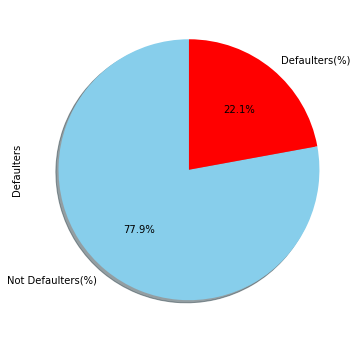

In [ ]:
# Chart - 1 visualization code
# Dependant Column Value Counts
print(df.Defaulters.value_counts())
print(" ")
# Dependant Variable Column Visualization
df['Defaulters'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not Defaulters(%)','Defaulters(%)'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

##### Do you think the dataset is imbalanced? Explain Why.

mbalanced dataset is relevant primarily in the context of supervised machine learning involving two or more classes.

Imbalance means that the number of data points available for different the classes is different: If there are two classes, then balanced data would mean 50% points for each of the class. For most machine learning techniques, little imbalance is not a problem. So, if there are 60% points for one class and 40% for the other class, it should not cause any significant performance degradation. Only when the class imbalance is high, e.g. 90% points for one class and 10% for the other, standard optimization criteria or performance measures may not be as effective and would need modification.

In our case the dataset dependent column data ratio is 78:22. So, during model creating it's obvios that there will be bias and having a great chance of predicting the majority one so frequently. SO the dataset should be balanced before it going for the model creation part.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I have used SMOTE (Synthetic Minority Over-sampling technique) for balanced the 78:22 dataset.

SMOTE is a technique in machine learning for dealing with issues that arise when working with an unbalanced data set. In practice, unbalanced data sets are common and most ML algorithms are highly prone to unbalanced data so we need to improve their performance by using techniques like SMOTE.

In [ ]:
#importing SMote to make our dataset balanced
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X,y)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [ ]:
#now checking the count of dependent variaable after balancing
(unique, counts) = np.unique(y_smote, return_counts=True)
np.asarray((unique, counts)).T

array([[    0, 23364],
       [    1, 23364]])

### 8. Data Splitting

Data splitting refers to the process of dividing a dataset into two or more subsets for different purposes, such as training and testing machine learning models, cross-validation, or evaluating model performance.

Splitting the data is essential to assess the performance of a model on unseen data and to avoid overfitting, which occurs when a model performs well on the training data but poorly on new, unseen data.

The most common type of data split is into training and testing sets:

Training set: This subset of the data is used to train the machine learning model. It is used to estimate the model parameters or learn the underlying patterns in the data.

Testing set: The testing set is used to evaluate the performance of the trained model on unseen data. It helps assess how well the model generalizes to new observations.

In [ ]:
#spliting data set into train and test dataset
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.25,random_state=101)

In [ ]:
#looking into independent variable of train dataset
X_train

LIMIT_BAL  PAY_SEPT  PAY_AUG  PAY_JUL  PAY_JUN  PAY_MAY  PAY_APR  \
21706     100000         0        0        0        0        0        0   
9316      120000         1       -2       -2       -2       -2       -2   
14797     320000        -1        0        0        0        0        0   
6958      280000        -1       -1       -1       -1       -1       -1   
11113      90000         0        0        0        0        0        0   
...          ...       ...      ...      ...      ...      ...      ...   
5695       20000         0        0        0        0        0        0   
8006       80000         0        0        0        0        0        0   
17745     340000        -1       -1       -1       -1        0        0   
17931     230000         2        0        0        0        2        2   
45919      60000         1        0        0        0        0        0   

       BILL_AMT_JUN  BILL_AMT_APR  PAY_AMT_SEPT  ...  EDUCATION_other  \
21706         93531         45512          4301  ...                0   
9316              0        -15296             0  ...                0   
14797         92474         77536          8200  ...                0   
6958              0          4626          2000  ...                0   
11113         72964         65845          3000  ...                0   
...             ...           ...           ...  ...              ...   
5695          18734         19413          1600  ...                0   
8006          45981         46192          2896  ...                0   
17745          8612             0          5399  ...                0   
17931        235163        225822         10183  ...                0   
45919         29565         28787          2036  ...                0   

       EDUCATION_university  MARRIAGE_married  MARRIAGE_others  \
21706                     0                 1                0   
9316                      1                 0                0   
14797                     1                 1                0   
6958                      0                 0                0   
11113                     1                 1                0   
...                     ...               ...              ...   
5695                      0                 0                0   
8006                      1                 0                0   
17745                     0                 1                0   
17931                     1                 0                0   
45919                     0                 0                0   

       MARRIAGE_single  age_group_21-30  age_group_31-40  age_group_41-50  \
21706                0                1                0                0   
9316                 1                1                0                0   
14797                0                0                1                0   
6958                 1                1                0                0   
11113                0                0                1                0   
...                ...              ...              ...              ...   
5695                 1                1                0                0   
8006                 1                1                0                0   
17745                0                0                0                0   
17931                1                0                1                0   
45919                0                0                0                0   

       age_group_51-60  age_group_60 & above  
21706                0                     0  
9316                 0                     0  
14797                0                     0  
6958                 0                     0  
11113                0                     0  
...                ...                   ...  
5695                 0                     0  
8006                 0                     0  
17745                1                     0  
17931                0                   

In [ ]:
y_train

21706    0
9316     1
14797    0
6958     0
11113    1
        ..
5695     0
8006     1
17745    1
17931    1
45919    1
Name: Defaulters, Length: 35046, dtype: int64

##### What data splitting ratio have you used and why? 

**In this case the training dataset is small, that's why I have taken 70:30 ratio.**

There are two competing concerns: with less training data, your parameter estimates have greater variance. With less testing data, your performance statistic will have greater variance. Broadly speaking you should be concerned with dividing data such that neither variance is too high, which is more to do with the absolute number of instances in each category rather than the percentage.

If you have a total of 100 instances, you're probably stuck with cross validation as no single split is going to give you satisfactory variance in your estimates. If you have 100,000 instances, it doesn't really matter whether you choose an 80:20 split or a 90:10 split (indeed you may choose to use less training data if your method is particularly computationally intensive).

You'd be surprised to find out that 80/20 is quite a commonly occurring ratio, often referred to as the Pareto principle. It's usually a safe bet if you use that ratio.


## ***7. ML Model Implementation***

# **Creating Function**

In [ ]:
model_accuracy=[]
model_precision=[]
model_recall=[]
model_f1_score=[]
model_roc_auc_score=[]


In [ ]:
# Creating Function to run diferent models
def run_and_evaluate_model(model,X_train,X_test,y_train,y_test, best_parameter=True, best_score=True):
  '''
  train the model and gives mse,rmse,r2,adj r2 score of the model
  can be used for any model where y is not transformed 
  '''

  start=time.time()
  #training the model
  model.fit(X_train,y_train)
  stop = time.time()

  time_min=round((stop - start)/60,4)
  print(f"Training time: {time_min}min",'\n')
  


  #predicting the values of y from x via model
  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)

  
  # Get the confusion matrix for both train and test
  from sklearn.metrics import confusion_matrix,classification_report

  def score (model,X,actual,predicted,append=True):
    accuracy = accuracy_score(actual,predicted)
    precision = precision_score(actual,predicted)
    recall = recall_score(actual,predicted)
    f1 = f1_score(actual,predicted)
    roc= roc_auc_score(actual,predicted)
    confusion_mat=confusion_matrix(actual,predicted)
    print("The accuracy is ", accuracy)
    print("The precision is ", precision)
    print("The recall is ", recall)
    print("The f1 is ", f1)
    print('the roc_auc_score  is ',roc)
    print('\nconfusion_matrix \n ',confusion_mat)
    

    if append==True:
      model_accuracy.append(accuracy)
      model_precision.append(precision)
      model_recall.append(recall)
      model_f1_score.append(f1)
      model_roc_auc_score.append(roc)
    else:
      pass

  print('score matrix for train')
  print('*'*80)
  score(model=model,X=X_train,actual=y_train,predicted=y_pred_train,append=False)
  print('\nClassification Report\n')
  print(classification_report(y_train, y_pred_train))
  print('\n')
  print('score matrix for test')
  print('*'*80)
  score(model=model,X=X_test,actual=y_test,predicted=y_pred_test)
  print('\nClassification Report\n')
  print(classification_report(y_test, y_pred_test))


# **creating function to get feature importance**

In [ ]:
#creating function to get features importance of all the tree based model
def get_features_importance(optimal_model,X_train):
  imp_feat=pd.DataFrame(index=X.columns,data=optimal_model.feature_importances_,columns=['importance'])
  imp_feat=imp_feat[imp_feat['importance']>0]
  imp_feat=imp_feat.sort_values('importance')
  plt.figure(figsize=(15,5))
  print(f'==========================Features Importance============================\n\n {optimal_model}\
  \n=========================================================================\n') 
  sns.barplot(data=imp_feat,x=imp_feat.index,y='importance')
  plt.xticks(rotation=90);
   

### ML Model - 1 --   Implementing Logistic Regression

Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.
Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.
Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

In [ ]:
# import Loggistic Regression
from sklearn.linear_model import LogisticRegression

In [ ]:
# ML Model - 1 Implementation
log_model = LogisticRegression(fit_intercept=True, max_iter=10000)
# Fit the Algorithm
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Checking the coefficients
log_model.coef_

array([[-9.43900110e-07,  4.07354466e-08,  3.28847091e-08,
         2.74955458e-08,  2.41733878e-08,  2.11918773e-08,
         1.89953224e-08,  8.47390607e-07,  4.74620971e-06,
        -1.59547038e-05, -1.67350860e-05, -8.87877384e-06,
        -1.14845067e-05, -8.90394641e-06, -2.58779806e-06,
        -7.50244328e-09, -3.53692174e-09, -7.19196297e-09,
        -3.87206973e-09, -9.74186233e-10, -4.17378501e-09,
        -3.61669754e-09, -4.33277996e-10, -8.64342848e-09,
        -6.98065935e-09, -7.76422827e-09, -4.76603921e-09,
        -1.88614538e-09, -3.20937456e-10]])

In [ ]:
# Checking the intercept value
log_model.intercept_

array([1.22763646e-08])

In [ ]:
# Predict on the model
# Get the predicted probabilities
train_preds = log_model.predict_proba(X_train)
test_preds = log_model.predict_proba(X_test)

In [ ]:
train_preds

array([[0.60040329, 0.39959671],
       [0.60066415, 0.39933585],
       [0.57473007, 0.42526993],
       ...,
       [0.66441297, 0.33558703],
       [0.39955953, 0.60044047],
       [0.498274  , 0.501726  ]])

In [ ]:
test_preds

array([[0.65053931, 0.34946069],
       [0.59722991, 0.40277009],
       [0.55380929, 0.44619071],
       ...,
       [0.50097225, 0.49902775],
       [0.62989729, 0.37010271],
       [0.57707774, 0.42292226]])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Evaluating the performance of a Machine learning model is one of the important steps while building an effective ML model. To evaluate the performance or quality of the model, different metrics are used, and these metrics are known as performance metrics or evaluation metrics**. 

In [ ]:
#running and evaluating log_model using function ccreated
run_and_evaluate_model(log_model,X_train,X_test,y_train,y_test)

Training time: 0.0042min 

score matrix for train
********************************************************************************
The accuracy is  0.5667979227301261
The precision is  0.6182446160097521
The recall is  0.34757281553398056
The f1 is  0.444980624405937
the roc_auc_score  is  0.5666354041173552

confusion_matrix 
  [[13778  3758]
 [11424  6086]]

Classification Report

              precision    recall  f1-score   support

           0       0.55      0.79      0.64     17536
           1       0.62      0.35      0.44     17510

    accuracy                           0.57     35046
   macro avg       0.58      0.57      0.54     35046
weighted avg       0.58      0.57      0.54     35046



score matrix for test
********************************************************************************
The accuracy is  0.5695086457798322
The precision is  0.6234660281352888
The recall is  0.3558250768705159
The f1 is  0.45307232191408375
the roc_auc_score  is  0.5699852906658688

c

I used Logistic regression algorithm to create the model. As I got not so good result. 

For training dataset, i found precision of 55% and recall of 79% and f1-score of 64% for our data. BUt, I am also interested to see the result for Defaulters as I got precision of 62% and recall of 35% and f1-score of 44%. Accuracy is 56% and average percision, recall & f1_score are 62%, 34% and 44% respectively with a roc auc score of 56%.

For testing dataset, i found precision of 62% and recall of 59% and f1-score of 60% for our data. BUt, I am also interested to see the result for Defaulters as I got precision of 61% and recall of 64% and f1-score of 62%. Accuracy is 61% and average percision, recall & f1_score are 60%, 63% and 62% respectively with a roc auc score of 61%.

Next tryting to improving the score by using hyperparameter tuning technique.



#### 2. Cross- Validation & Hyperparameter Tuning

**Using GridSearch CV**

In [ ]:
# creating param dict for hyperparameter tuning
param_dict= {'C': [0.001,0.01,0.1,1,10,100],'penalty': ['l1', 'l2'],'max_iter':[1000]} 

In [ ]:

#creating Grid model to perform grid search

grid_log_model = GridSearchCV(log_model, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall') 

In [ ]:
#running and evaluating grid_log_model using function ccreated
run_and_evaluate_model(grid_log_model,X_train,X_test,y_train,y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Training time: 0.126min 

score matrix for train
********************************************************************************
The accuracy is  0.5667979227301261
The precision is  0.6182446160097521
The recall is  0.34757281553398056
The f1 is  0.444980624405937
the roc_auc_score  is  0.5666354041173552

confusion_matrix 
  [[13778  3758]
 [11424  6086]]

Classification Report

              precision    recall  f1-score   support

           0       0.55      0.79      0.64     17536
           1       0.62      0.35      0.44     17510

    accuracy                           0.57     35046
   macro avg       0.58      0.57      0.54     35046
weighted avg       0.58      0.57      0.54     35046



score matrix for test
********************************************************************************
The accuracy is  0.5695086457798322
The precision is  0.6234660281352888
The recall is  0.3558250768705159
The f1 is  0.45

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. 
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. 

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


For training dataset, i found precision of 55% and recall of 79% and f1-score of 64% for our data. BUt, I am also interested to see the result for Defaulters as I got precision of 62% and recall of 35% and f1-score of 44%. Accuracy is 56% and average percision, recall & f1_score are 6%, 34% and 44% respectively with a roc auc score of 56%.

NO improvment seen in precsion, f1 score,accuracy and roc auc score 

For testing dataset, i found precision of 55% and recall of 78% and f1-score of 65% for our data. BUt, I am also interested to see the result for Defaulters as I got precision of 62% and recall of 36% and f1-score of 45%. Accuracy is 56% and average percision, recall & f1_score are 62%, 35% and 45% respectively with a roc auc score of 56%.

NO improvemnt seen in precsion, f1 score and roc auc 


**Features	Importance**

In [ ]:
#getting the coeficient of best estimator
grid_log_model.best_estimator_.coef_

array([[-9.43900111e-07,  4.07354471e-08,  3.28847095e-08,
         2.74955461e-08,  2.41733881e-08,  2.11918776e-08,
         1.89953227e-08,  8.47390607e-07,  4.74620971e-06,
        -1.59547037e-05, -1.67350860e-05, -8.87877384e-06,
        -1.14845067e-05, -8.90394640e-06, -2.58779807e-06,
        -7.50244338e-09, -3.53692178e-09, -7.19196307e-09,
        -3.87206978e-09, -9.74186246e-10, -4.17378507e-09,
        -3.61669759e-09, -4.33278002e-10, -8.64342859e-09,
        -6.98065943e-09, -7.76422836e-09, -4.76603927e-09,
        -1.88614540e-09, -3.20937460e-10]])

In [ ]:
optimal_log_model=grid_log_model.best_estimator_.coef_

In [ ]:
#ccreating dataframe for feature imp
feature_importance = pd.DataFrame({'Features':X.columns, 'Importance':np.abs(optimal_log_model).ravel() })

In [ ]:
#sorting the feat impt df by importance
imp_feat = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

In [ ]:
imp_feat

Features    Importance
10   PAY_AMT_AUG  1.673509e-05
9   PAY_AMT_SEPT  1.595470e-05
12   PAY_AMT_JUN  1.148451e-05
13   PAY_AMT_MAY  8.903946e-06
11   PAY_AMT_JUL  8.878774e-06
8   BILL_AMT_APR  4.746210e-06
14   PAY_AMT_APR  2.587798e-06
0      LIMIT_BAL  9.439001e-07
7   BILL_AMT_JUN  8.473906e-07
1       PAY_SEPT  4.073545e-08

==========================Features Importance============================

 [[-9.43900111e-07  4.07354471e-08  3.28847095e-08  2.74955461e-08
   2.41733881e-08  2.11918776e-08  1.89953227e-08  8.47390607e-07
   4.74620971e-06 -1.59547037e-05 -1.67350860e-05 -8.87877384e-06
  -1.14845067e-05 -8.90394640e-06 -2.58779807e-06 -7.50244338e-09
  -3.53692178e-09 -7.19196307e-09 -3.87206978e-09 -9.74186246e-10
  -4.17378507e-09 -3.61669759e-09 -4.33278002e-10 -8.64342859e-09
  -6.98065943e-09 -7.76422836e-09 -4.76603927e-09 -1.88614540e-09
  -3.20937460e-10]]



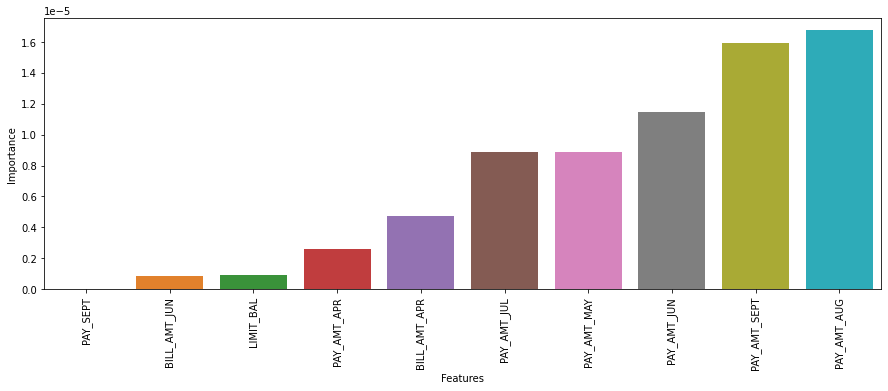

In [ ]:
#visualizing the feature importance
imp_feat=imp_feat[imp_feat['Importance']>0]
imp_feat=imp_feat.sort_values('Importance')
plt.figure(figsize=(15,5))
print(f'==========================Features Importance============================\n\n {optimal_log_model}\
\n=========================================================================\n') 
sns.barplot(data=imp_feat,x=imp_feat.Features,y='Importance')
plt.xticks(rotation=90);

### ML Model - 2 -   Implementing   Decision Tree

**Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome**.

**In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.**

**The decisions or the test are performed on the basis of features of the given dataset** 
**It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.**
**It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.**

In [ ]:
#impoting decisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# creating DecisionTree model
DecisionTree = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=45,criterion='entropy')

# training and evaluating the DecisionTree
run_and_evaluate_model(DecisionTree,X_train, X_test, y_train, y_test)

Training time: 0.0061min 

score matrix for train
********************************************************************************
The accuracy is  0.8239742053301375
The precision is  0.8886832545068202
The recall is  0.740434037692747
The f1 is  0.8078133275179912
the roc_auc_score  is  0.823912274320826

confusion_matrix 
  [[15912  1624]
 [ 4545 12965]]

Classification Report

              precision    recall  f1-score   support

           0       0.78      0.91      0.84     17536
           1       0.89      0.74      0.81     17510

    accuracy                           0.82     35046
   macro avg       0.83      0.82      0.82     35046
weighted avg       0.83      0.82      0.82     35046



score matrix for test
********************************************************************************
The accuracy is  0.8252011641842151
The precision is  0.898078529657477
The recall is  0.7345404851383669
The f1 is  0.8081187746664161
the roc_auc_score  is  0.8254033928780372

confu

In [ ]:
DecisionTree.feature_importances_

array([0.00456344, 0.2142405 , 0.08722923, 0.00602735, 0.        ,
       0.        , 0.01590445, 0.        , 0.        , 0.01590336,
       0.02280816, 0.        , 0.01085021, 0.        , 0.        ,
       0.01452435, 0.087112  , 0.03411129, 0.03542163, 0.03524716,
       0.01717582, 0.26262911, 0.06040497, 0.05919398, 0.00347932,
       0.00262117, 0.00658547, 0.00396703, 0.        ])

I used Decision Tree algorithm to create the model. As I got better result to Logistic regression result. 

For training dataset, i found precision of 78% and recall of 91% and f1-score of 84% for our data. BUt, I am also interested to see the result for Defaulters as I got precision of 89% and recall of 74% and f1-score of 81%. Accuracy is 82% and average percision, recall & f1_score are 88%, 74% and 80% respectively with a roc auc score of 82%.

For testing dataset, i found precision of 77% and recall of 92% and f1-score of 84% for our data. BUt, I am also interested to see the result for Defaulters as I got precision of 90% and recall of 73% and f1-score of 81%. Accuracy is 82% and average percision, recall & f1_score are 89%, 73% and 80% respectively with a roc auc score of 82%.





==========================Features Importance============================

 DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=45)  



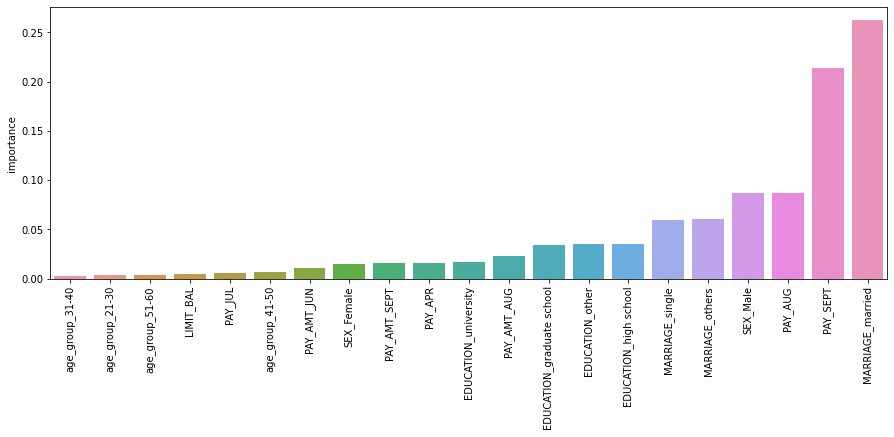

In [ ]:
get_features_importance(DecisionTree,X_train)

### ML Model - 3  --  Implementing  Random Forest

**Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model**.

**As the name suggests, "Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset." Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output**

In [ ]:
#importing Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier()

In [ ]:
# training and evaluating the Random forest
run_and_evaluate_model(rfc_model,X_train, X_test, y_train, y_test)

Training time: 0.1628min 

score matrix for train
********************************************************************************
The accuracy is  0.9979740911944301
The precision is  0.9982286726472773
The recall is  0.9977155910908052
The f1 is  0.9979720659221386
the roc_auc_score  is  0.9979738995600012

confusion_matrix 
  [[17505    31]
 [   40 17470]]

Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17536
           1       1.00      1.00      1.00     17510

    accuracy                           1.00     35046
   macro avg       1.00      1.00      1.00     35046
weighted avg       1.00      1.00      1.00     35046



score matrix for test
********************************************************************************
The accuracy is  0.8777606574216744
The precision is  0.9137995512341062
The recall is  0.8348138025281858
The f1 is  0.8725227637921799
the roc_auc_score  is  0.877856455141924

con

I used Random Forest algorithm to create the model. As I got  so good result. 

For training dataset, i found precision of 1% and recall of 1% and f1-score of 1% for our data. BUt, I am also interested to see the result for Defaulters as I got precision of 1% and recall of 1% and f1-score of 1%. Accuracy is 99% and average percision, recall & f1_score are 99%, 99% and 99% respectively with a roc auc score of 99%.

For testing dataset, i found precision of 85% and recall of 92% and f1-score of 88% for our data. BUt, I am also interested to see the result for Defaulters as I got precision of 91% and recall of 83% and f1-score of 87%. Accuracy is 87% and average percision, recall & f1_score are 91%, 83% and 87% respectively with a roc auc score of 87%.

Next tryting to improving the score by using hyperparameter tuning technique.



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# finding the best parameters for rfc_model by gridsearchcv
grid_values = {'n_estimators': [150,200,250],'max_depth': [3,5,9],'criterion': ['entropy']}
grid_rfc_model = GridSearchCV(estimator=rfc_model,param_grid = grid_values, scoring='balanced_accuracy',cv=5,verbose=5,n_jobs=-1)

In [ ]:
# training and evaluating the Random forest with hyperparameter tuing
run_and_evaluate_model(grid_rfc_model,X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Training time: 4.6591min 

score matrix for train
********************************************************************************
The accuracy is  0.8656622724419335
The precision is  0.907655075786524
The recall is  0.8139348943460879
The f1 is  0.858244008189811
the roc_auc_score  is  0.8656239252752338

confusion_matrix 
  [[16086  1450]
 [ 3258 14252]]

Classification Report

              precision    recall  f1-score   support

           0       0.83      0.92      0.87     17536
           1       0.91      0.81      0.86     17510

    accuracy                           0.87     35046
   macro avg       0.87      0.87      0.87     35046
weighted avg       0.87      0.87      0.87     35046



score matrix for test
********************************************************************************
The accuracy is  0.8526793357301832
The precision is  0.9007174713980997
The recall is  0.7934745473180731
The f1 is  0.8437

In [ ]:
#getting the best paramater of random forest
grid_rfc_model.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 250}

In [ ]:
#getting the best estimator for random forest
grid_rfc_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=250)

In [ ]:
#storing best estimator in varibale
optimal__rfc_model=grid_rfc_model.best_estimator_

==========================Features Importance============================

 RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=250)  



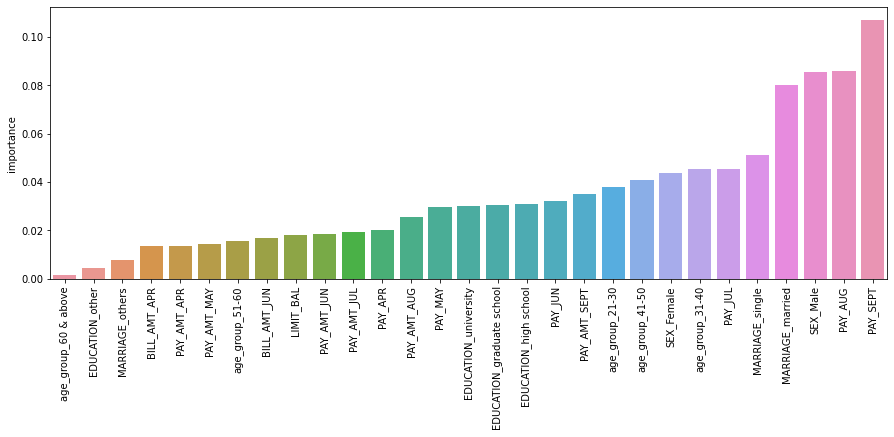

In [ ]:
#visualizing the feature importance of variable for random forest
get_features_importance(optimal__rfc_model,X_train)

### ML Model - 4  --  Implementing  Support Vector Machine

**Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning**.

**The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.**

In [ ]:
#importing SVM
from sklearn.svm import SVC
svc_model=SVC()

In [ ]:
# training and evaluating the SVC model 
run_and_evaluate_model(svc_model,X_train,X_test,y_train,y_test)

Training time: 2.7715min 

score matrix for train
********************************************************************************
The accuracy is  0.6165040232836843
The precision is  0.6047996704088989
The recall is  0.6707024557395774
The f1 is  0.6360485268630849
the roc_auc_score  is  0.6165442023223435

confusion_matrix 
  [[ 9862  7674]
 [ 5766 11744]]

Classification Report

              precision    recall  f1-score   support

           0       0.63      0.56      0.59     17536
           1       0.60      0.67      0.64     17510

    accuracy                           0.62     35046
   macro avg       0.62      0.62      0.62     35046
weighted avg       0.62      0.62      0.62     35046



score matrix for test
********************************************************************************
The accuracy is  0.6148775894538606
The precision is  0.6032302300777084
The recall is  0.676289716433208
The f1 is  0.6376741563984859
the roc_auc_score  is  0.6147406028974551

con

### ML Model - 5  --  Implementing  XGboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# creating XGBRegressor model
xgboost_model=XGBClassifier()

In [ ]:
# training and evaluating the Xgboost model
run_and_evaluate_model(xgboost_model,X_train,X_test,y_train,y_test)

Training time: 0.0857min 

score matrix for train
********************************************************************************
The accuracy is  0.8707698453461166
The precision is  0.9250769533040801
The recall is  0.8066818960593947
The f1 is  0.861832270661094
the roc_auc_score  is  0.8707223348910113

confusion_matrix 
  [[16392  1144]
 [ 3385 14125]]

Classification Report

              precision    recall  f1-score   support

           0       0.83      0.93      0.88     17536
           1       0.93      0.81      0.86     17510

    accuracy                           0.87     35046
   macro avg       0.88      0.87      0.87     35046
weighted avg       0.88      0.87      0.87     35046



score matrix for test
********************************************************************************
The accuracy is  0.8704845060777264
The precision is  0.9302279484638256
The recall is  0.8016740690126409
The f1 is  0.8611799247637398
the roc_auc_score  is  0.870637995384838

conf

### Hyperparameter tuning for Xgboost

In [ ]:
# finding the best parameters for XGBRegressor by gridsearchcv
params={'n_estimators': [50,100,150],'max_depth': [3,5,9]}
grid_xgboost_model=GridSearchCV(estimator=xgboost_model,param_grid=params,cv=5,scoring='recall',verbose=5,n_jobs=-1)

In [ ]:
# training and evaluating the xgb_grid
run_and_evaluate_model(grid_xgboost_model,X_train,X_test,y_train,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Training time: 4.0092min 

score matrix for train
********************************************************************************
The accuracy is  0.9419905267362895
The precision is  0.9865451116001257
The recall is  0.8961165048543689
The f1 is  0.9391590603022594
the roc_auc_score  is  0.9419565188505421

confusion_matrix 
  [[17322   214]
 [ 1819 15691]]

Classification Report

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     17536
           1       0.99      0.90      0.94     17510

    accuracy                           0.94     35046
   macro avg       0.95      0.94      0.94     35046
weighted avg       0.95      0.94      0.94     35046



score matrix for test
********************************************************************************
The accuracy is  0.8771614449580551
The precision is  0.9345132743362832
The recall is  0.8117526477622139
The f1 is  0.86

==========================Features Importance============================

 XGBClassifier()  



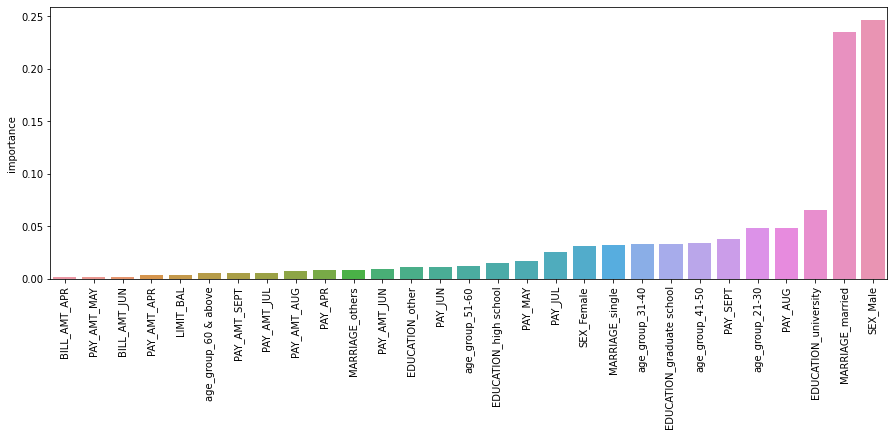

In [ ]:
#visaulizing feature importance
get_features_importance(xgboost_model,X_train)

### ML Model - 5  --  Implementing  CatBoost

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 21 kB/s 


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
cb_model=CatBoostClassifier(verbose=0)

In [ ]:
cb_model=CatBoostClassifier()

In [ ]:
# training and evaluating the cb model
run_and_evaluate_model(cb_model,X_train,X_test,y_train,y_test)

Learning rate set to 0.047043
0:	learn: 0.6502319	total: 125ms	remaining: 2m 4s
1:	learn: 0.6196818	total: 186ms	remaining: 1m 32s
2:	learn: 0.6005848	total: 204ms	remaining: 1m 7s
3:	learn: 0.5835790	total: 217ms	remaining: 54.1s
4:	learn: 0.5618910	total: 229ms	remaining: 45.5s
5:	learn: 0.5428810	total: 241ms	remaining: 40s
6:	learn: 0.5243875	total: 255ms	remaining: 36.1s
7:	learn: 0.5062885	total: 268ms	remaining: 33.2s
8:	learn: 0.4923512	total: 281ms	remaining: 31s
9:	learn: 0.4776314	total: 295ms	remaining: 29.2s
10:	learn: 0.4701868	total: 307ms	remaining: 27.6s
11:	learn: 0.4633342	total: 320ms	remaining: 26.3s
12:	learn: 0.4547224	total: 333ms	remaining: 25.3s
13:	learn: 0.4453234	total: 347ms	remaining: 24.4s
14:	learn: 0.4375208	total: 360ms	remaining: 23.6s
15:	learn: 0.4310087	total: 374ms	remaining: 23s
16:	learn: 0.4257573	total: 427ms	remaining: 24.7s
17:	learn: 0.4211750	total: 481ms	remaining: 26.3s
18:	learn: 0.4150698	total: 522ms	remaining: 26.9s
19:	learn: 0.410

### Hyperparameter tuning for Catboost

In [ ]:
# finding the best parameters for XGBRegressor by gridsearchcv
params={'n_estimators': [50,100,150],'max_depth': [3,5,9]}
grid_cb_model=GridSearchCV(estimator=cb_model,param_grid=params,cv=3,scoring='recall',verbose=0,n_jobs=-1)

In [ ]:
# training and evaluating the catboost model with hyperparameter tuing
run_and_evaluate_model(grid_cb_model,X_train,X_test,y_train,y_test)

Learning rate set to 0.388593
0:	learn: 0.4477981	total: 109ms	remaining: 10.8s
1:	learn: 0.3875347	total: 203ms	remaining: 9.96s
2:	learn: 0.3466431	total: 293ms	remaining: 9.46s
3:	learn: 0.3374587	total: 370ms	remaining: 8.87s
4:	learn: 0.3227524	total: 455ms	remaining: 8.65s
5:	learn: 0.3136862	total: 568ms	remaining: 8.89s
6:	learn: 0.3094694	total: 625ms	remaining: 8.3s
7:	learn: 0.3069027	total: 669ms	remaining: 7.7s
8:	learn: 0.3041162	total: 744ms	remaining: 7.52s
9:	learn: 0.3003860	total: 819ms	remaining: 7.38s
10:	learn: 0.2982832	total: 882ms	remaining: 7.14s
11:	learn: 0.2964327	total: 953ms	remaining: 6.99s
12:	learn: 0.2943278	total: 1.04s	remaining: 6.96s
13:	learn: 0.2912113	total: 1.14s	remaining: 6.98s
14:	learn: 0.2898585	total: 1.22s	remaining: 6.91s
15:	learn: 0.2804573	total: 1.32s	remaining: 6.94s
16:	learn: 0.2775170	total: 1.46s	remaining: 7.14s
17:	learn: 0.2761602	total: 1.57s	remaining: 7.15s
18:	learn: 0.2734609	total: 1.66s	remaining: 7.06s
19:	learn: 0.

==========================Features Importance============================




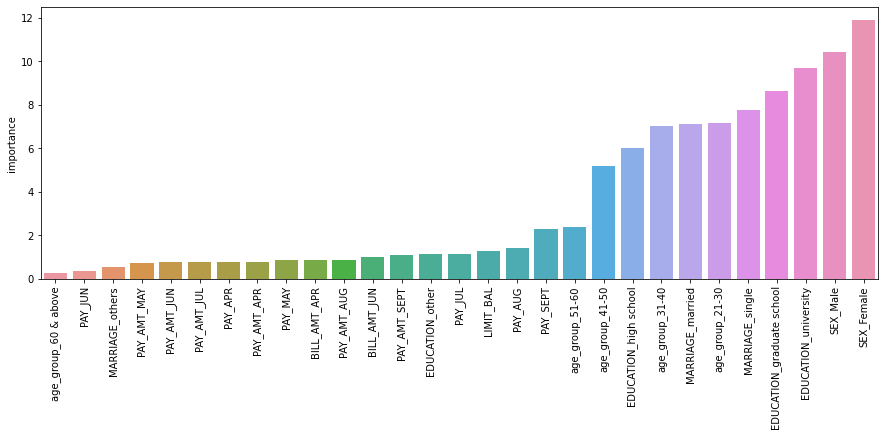

In [ ]:
# visualizing feature importance
get_features_importance(cb_model,X_train)

# Model's Score matrix

In [ ]:
#creating dictionary to store all the metrices 
dict={'accuracy':model_accuracy,'precision':model_precision,'recall':model_recall,'f1':model_f1_score,'roc_auc':model_roc_auc_score}

In [ ]:
# list of all models
model_name=['Logestic Regrestion','grid_log_regg','Desision Tree','Random forest','grid random forest','SVM','XGboost','Grid Xgboost','CATBoost','Grid Catboost']

In [ ]:
# converting dictionary to dataframe
matrix_df=pd.DataFrame.from_dict(dict,orient="index",columns=model_name)

In [ ]:
# taking the transpose of the dataframe to make it more visual appealing
matrix_df=matrix_df.transpose().reset_index().rename(columns={'index':'Models'})

In [ ]:
matrix_df

Models  accuracy  precision    recall        f1   roc_auc
0  Logestic Regrestion  0.569509   0.623466  0.355825  0.453072  0.569985
1        grid_log_regg  0.569509   0.623466  0.355825  0.453072  0.569985
2        Desision Tree  0.825201   0.898079  0.734540  0.808119  0.825403
3        Random forest  0.877761   0.913800  0.834814  0.872523  0.877856
4   grid random forest  0.852679   0.900717  0.793475  0.843702  0.852811
5                  SVM  0.614878   0.603230  0.676290  0.637674  0.614741
6              XGboost  0.870485   0.930228  0.801674  0.861180  0.870638
7         Grid Xgboost  0.877161   0.934513  0.811753  0.868818  0.877307
8             CATBoost  0.875364   0.935101  0.807311  0.866520  0.875516
9        Grid Catboost  0.871512   0.922539  0.811753  0.863607  0.871645

# **Conclusion**



**We found that using Random forest and Grid Xgboost and CATBoost are better model in all .**



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***